In [1]:
%config InlineBackend.figure_format = 'retina'

# Testing Enviornment

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [2]:
%run ../test/test_algorithms.py

......................
----------------------------------------------------------------------
Ran 22 tests in 0.092s

OK


In [3]:
%run ../test/test_dataloader.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.035s

OK


In [4]:
%run ../test/test_predictorsI.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.012s

OK


In [5]:
%run ../test/test_predictorsII.py

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [6]:
%run ../test/test_activate.py

...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


## Running example of the system

In [ ]:
%run ../consensus/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [ ]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [ ]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 24, 30)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(150)

In [ ]:
op0.show_performance()

In [ ]:
op0.save_model()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(100,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## Whole system test - I am alive v.2

In [7]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [8]:
training = DataLoader('aapl', '2009-01-01', '2010-05-01')

In [9]:
training = training.get_close()

In [ ]:
#real = DataLoader('aapl', '2010-05-01', '2010-05-28')

In [ ]:
#real = real.get_close()

In [ ]:
#len(real)

In [10]:
predict = DataLoader('aapl', '2010-06-01', '2010-09-01')

In [11]:
predict = predict.get_close()

In [12]:
predict_req, real = data_prep(predict, 24, 30)

In [ ]:
#real

In [ ]:
final_df1 = individual_predictors1(training, predict_req, 30)

In [ ]:
final_df2 = individual_predictors2(training, predict_req, 30)

Epoch 1/10
23/23 [==============================] - 0s 21ms/step - loss: 31.4511 - mean_squared_error: 31.4511 - val_loss: 34.6170 - val_mean_squared_error: 34.6170
Epoch 2/10
23/23 [==============================] - 0s 5ms/step - loss: 12.6130 - mean_squared_error: 12.6130 - val_loss: 14.0164 - val_mean_squared_error: 14.0164
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 4.5955 - mean_squared_error: 4.5955 - val_loss: 3.8979 - val_mean_squared_error: 3.8979
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 1.0801 - mean_squared_error: 1.0801 - val_loss: 0.7821 - val_mean_squared_error: 0.7821
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.2078 - mean_squared_error: 0.2078 - val_loss: 0.4199 - val_mean_squared_error: 0.4199
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.1243 - mean_squared_error: 0.1243 - val_loss: 0.3973 - val_mean_squared_error: 0.3973
Epoch 7/10
23/23 [=============

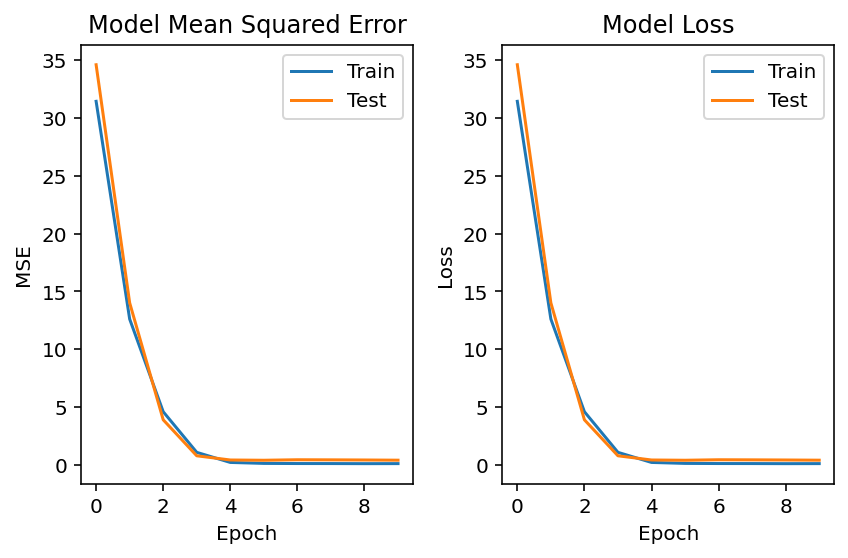

Epoch 1/10
23/23 [==============================] - 1s 33ms/step - loss: 26.4723 - mean_squared_error: 26.4723 - val_loss: 22.9106 - val_mean_squared_error: 22.9106
Epoch 2/10
23/23 [==============================] - 0s 16ms/step - loss: 10.5245 - mean_squared_error: 10.5245 - val_loss: 7.0686 - val_mean_squared_error: 7.0686
Epoch 3/10
23/23 [==============================] - 0s 15ms/step - loss: 2.8701 - mean_squared_error: 2.8701 - val_loss: 1.5664 - val_mean_squared_error: 1.5664
Epoch 4/10
23/23 [==============================] - 0s 15ms/step - loss: 0.4296 - mean_squared_error: 0.4296 - val_loss: 0.4977 - val_mean_squared_error: 0.4977
Epoch 5/10
23/23 [==============================] - 0s 15ms/step - loss: 0.1793 - mean_squared_error: 0.1793 - val_loss: 0.5075 - val_mean_squared_error: 0.5075
Epoch 6/10
23/23 [==============================] - 0s 15ms/step - loss: 0.1293 - mean_squared_error: 0.1293 - val_loss: 0.5697 - val_mean_squared_error: 0.5697
Epoch 7/10
23/23 [==========

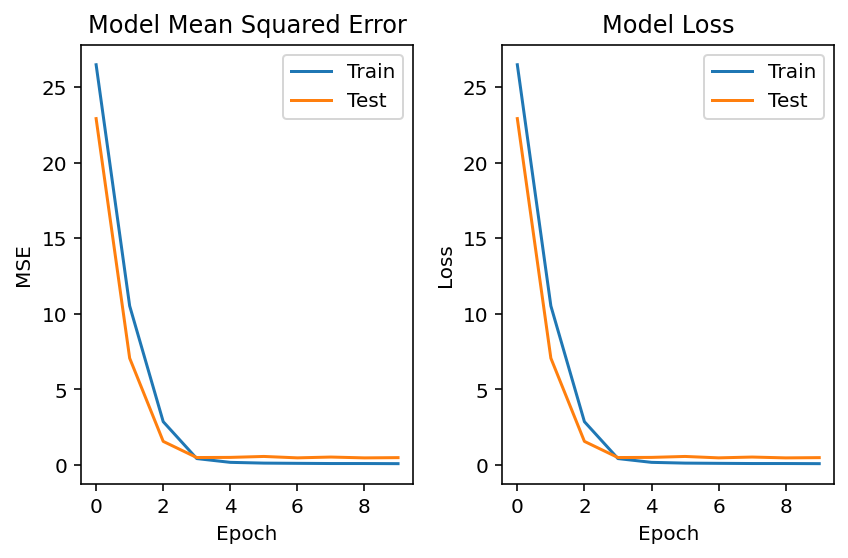

Epoch 1/10
23/23 [==============================] - 0s 7ms/step - loss: 20.9139 - mean_squared_error: 20.9139 - val_loss: 13.5562 - val_mean_squared_error: 13.5562
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 3.3755 - mean_squared_error: 3.3755 - val_loss: 1.6800 - val_mean_squared_error: 1.6800
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3546 - mean_squared_error: 0.3546 - val_loss: 0.4511 - val_mean_squared_error: 0.4511
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1284 - mean_squared_error: 0.1284 - val_loss: 0.3773 - val_mean_squared_error: 0.3773
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.3446 - val_mean_squared_error: 0.3446
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.3635 - val_mean_squared_error: 0.3635
Epoch 7/10
23/23 [==================

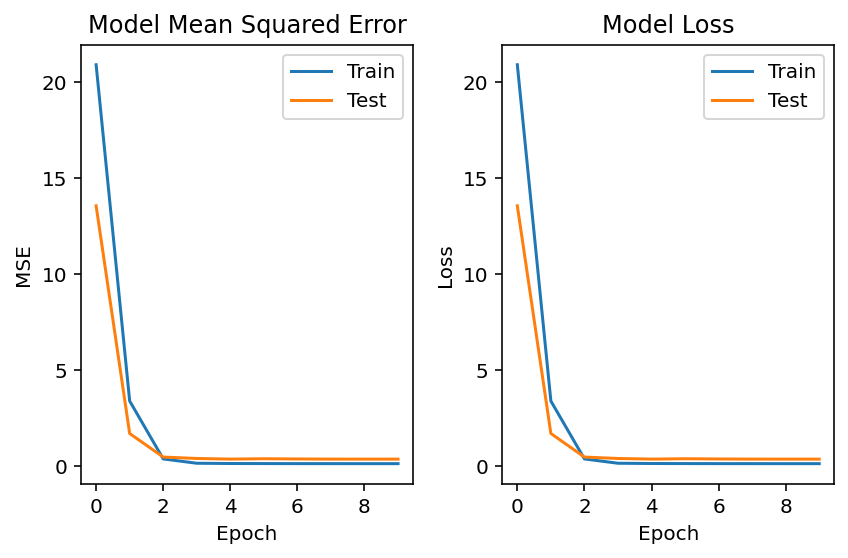

Epoch 1/10
23/23 [==============================] - 0s 5ms/step - loss: 24.6487 - mean_squared_error: 24.6487 - val_loss: 24.3193 - val_mean_squared_error: 24.3193
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 8.4449 - mean_squared_error: 8.4449 - val_loss: 6.5571 - val_mean_squared_error: 6.5571
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 1.5632 - mean_squared_error: 1.5632 - val_loss: 0.6406 - val_mean_squared_error: 0.6406
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1901 - mean_squared_error: 0.1901 - val_loss: 0.3909 - val_mean_squared_error: 0.3909
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1340 - mean_squared_error: 0.1340 - val_loss: 0.3597 - val_mean_squared_error: 0.3597
Epoch 6/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1261 - mean_squared_error: 0.1261 - val_loss: 0.3587 - val_mean_squared_error: 0.3587
Epoch 7/10
23/23 [==================

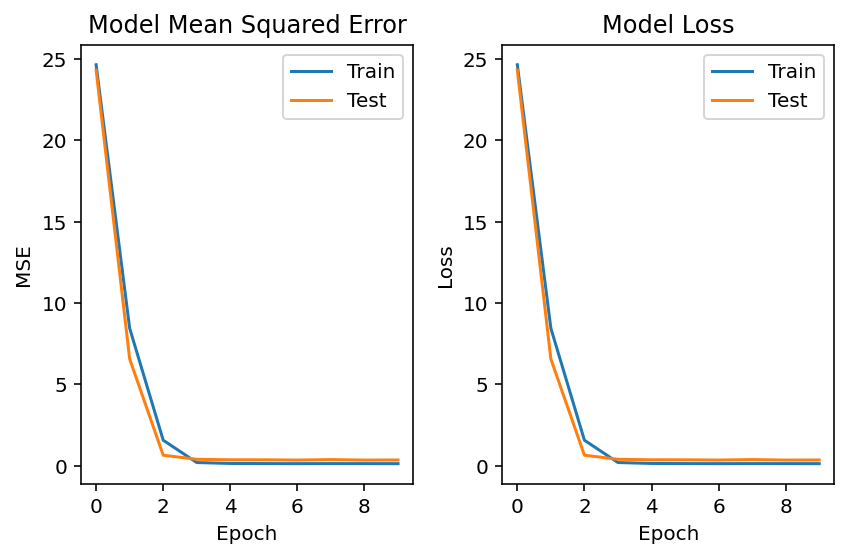

Epoch 1/10
23/23 [==============================] - 1s 41ms/step - loss: 25.4548 - mean_squared_error: 25.4548 - val_loss: 23.1767 - val_mean_squared_error: 23.1767
Epoch 2/10
23/23 [==============================] - 1s 24ms/step - loss: 8.9752 - mean_squared_error: 8.9752 - val_loss: 5.2922 - val_mean_squared_error: 5.2922
Epoch 3/10
23/23 [==============================] - 0s 20ms/step - loss: 0.8081 - mean_squared_error: 0.8081 - val_loss: 1.3925 - val_mean_squared_error: 1.3925
Epoch 4/10
23/23 [==============================] - 0s 20ms/step - loss: 0.1973 - mean_squared_error: 0.1973 - val_loss: 0.6097 - val_mean_squared_error: 0.6097
Epoch 5/10
23/23 [==============================] - 0s 19ms/step - loss: 0.1404 - mean_squared_error: 0.1404 - val_loss: 0.4374 - val_mean_squared_error: 0.4374
Epoch 6/10
23/23 [==============================] - 0s 19ms/step - loss: 0.1303 - mean_squared_error: 0.1303 - val_loss: 0.5299 - val_mean_squared_error: 0.5299
Epoch 7/10
23/23 [============

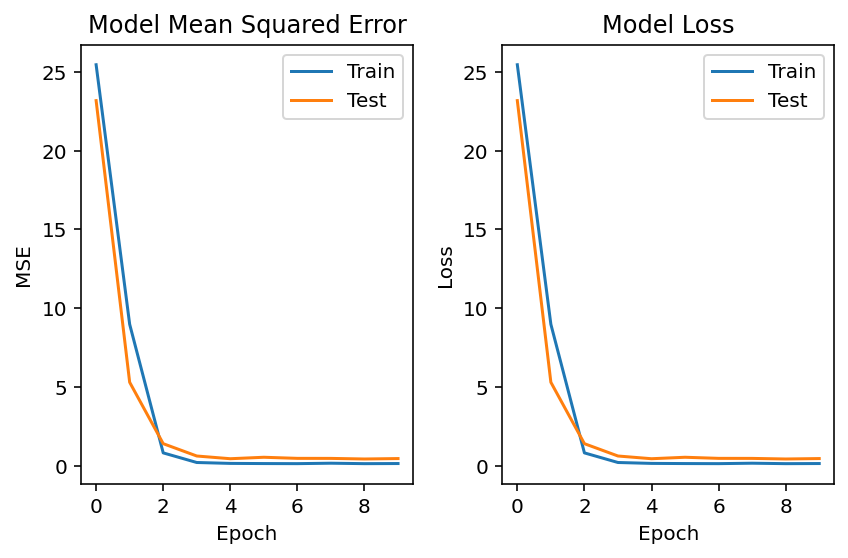

In [28]:
final_df3 = individual_predictors3(training, predict_req, 30)

In [29]:
final_df3

,CNN-LSTM,Bidirectional LSTM,CNN,MLP,LSTM
0,9.123990,8.708145,9.396232,9.543623,8.852666
1,8.188514,6.959102,9.254971,9.774819,8.148229
2,8.782791,7.534616,9.339995,9.615573,7.775361
3,9.131510,9.288514,9.469252,9.474124,8.200166
4,8.815100,8.857757,9.536870,9.923273,8.138727
5,8.846088,7.722362,9.559597,9.827134,8.976467
6,9.217006,7.090896,9.510055,9.861422,8.517729
7,9.414525,8.208552,9.659392,9.578051,7.650172
8,9.176423,6.468676,9.728888,9.628030,7.991935
9,9.983529,6.572246,9.629498,9.950451,6.211072


In [ ]:
final_df4 = individual_predictors4(training, predict_req, 30)

In [ ]:
final_df5 = individual_predictors5(training, 20)

In [13]:
final_df6 = individual_predictors_pretrained1(predict_req, 30)

In [14]:
final_df6

,CNN-LSTM,MLP,CNN
0,9.116774,9.221597,8.817613
1,8.952804,9.571225,8.808110
2,8.725756,8.856209,8.584846
3,8.563080,10.683270,8.502132
4,8.261903,9.079777,8.217581
5,7.963663,9.712100,8.196969
6,7.678870,9.424383,8.080855
7,6.938310,8.293983,7.917155
8,6.712652,9.337017,7.797997
9,6.351397,9.581328,7.738123


### System Disagreement

In [ ]:
system_disagreement(final_df1)

In [ ]:
system_disagreement(final_df2)

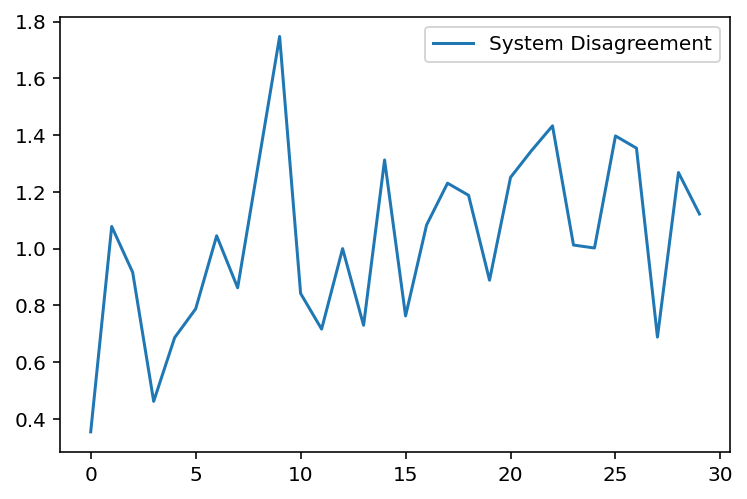

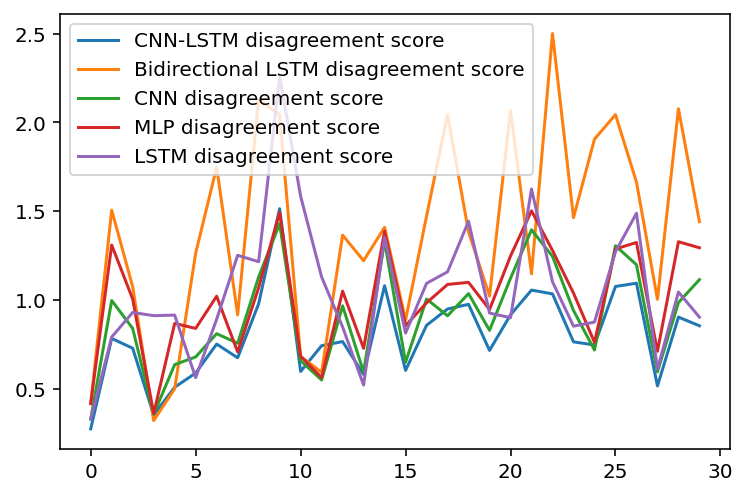

In [30]:
system_disagreement(final_df3)

In [ ]:
system_disagreement(final_df4)

In [ ]:
system_disagreement(final_df5)

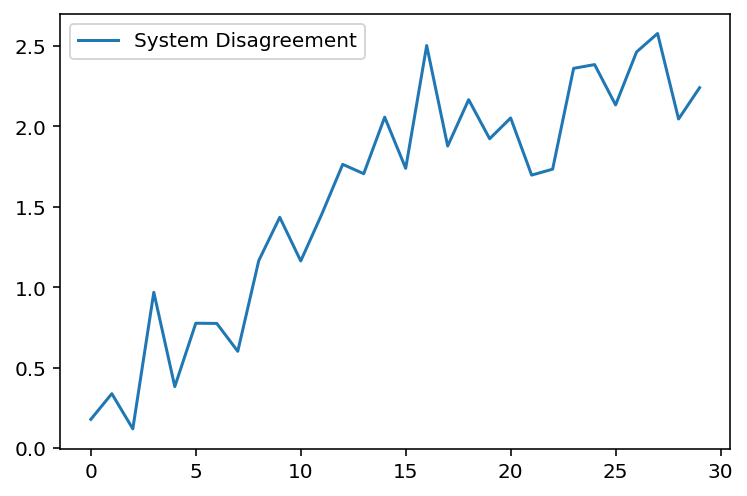

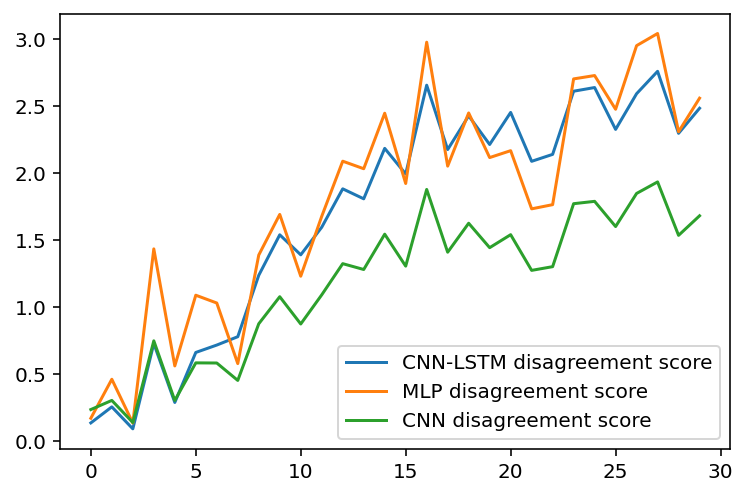

In [15]:
system_disagreement(final_df6)

### System consensus

In [ ]:
algos1 = consensus(final_df1, real)

In [ ]:
algos2 = consensus(final_df2, real)

In [31]:
algos3 = consensus(final_df3, real)

In [ ]:
algos4 = consensus(final_df4, real)

In [ ]:
algos5 = consensus(final_df5, real)

In [16]:
algos6 = consensus(final_df6, real)

In [ ]:
ui1 = combined_frame(final_df1, algos1, real)

In [ ]:
ui2 = combined_frame(final_df2, algos2, real)

In [34]:
ui3 = combined_frame(final_df3, algos3, real)

In [ ]:
ui4 = combined_frame(final_df4, algos4, real)

In [33]:
ui5 = combined_frame(final_df5, algos5, real)

In [17]:
ui6 = combined_frame(final_df6, algos6, real)

In [18]:
yu = all_stats_frame(ui6, final_df6)

In [36]:
yu3 = all_stats_frame(ui3, final_df3)

In [39]:
mat6 = correlation(yu)

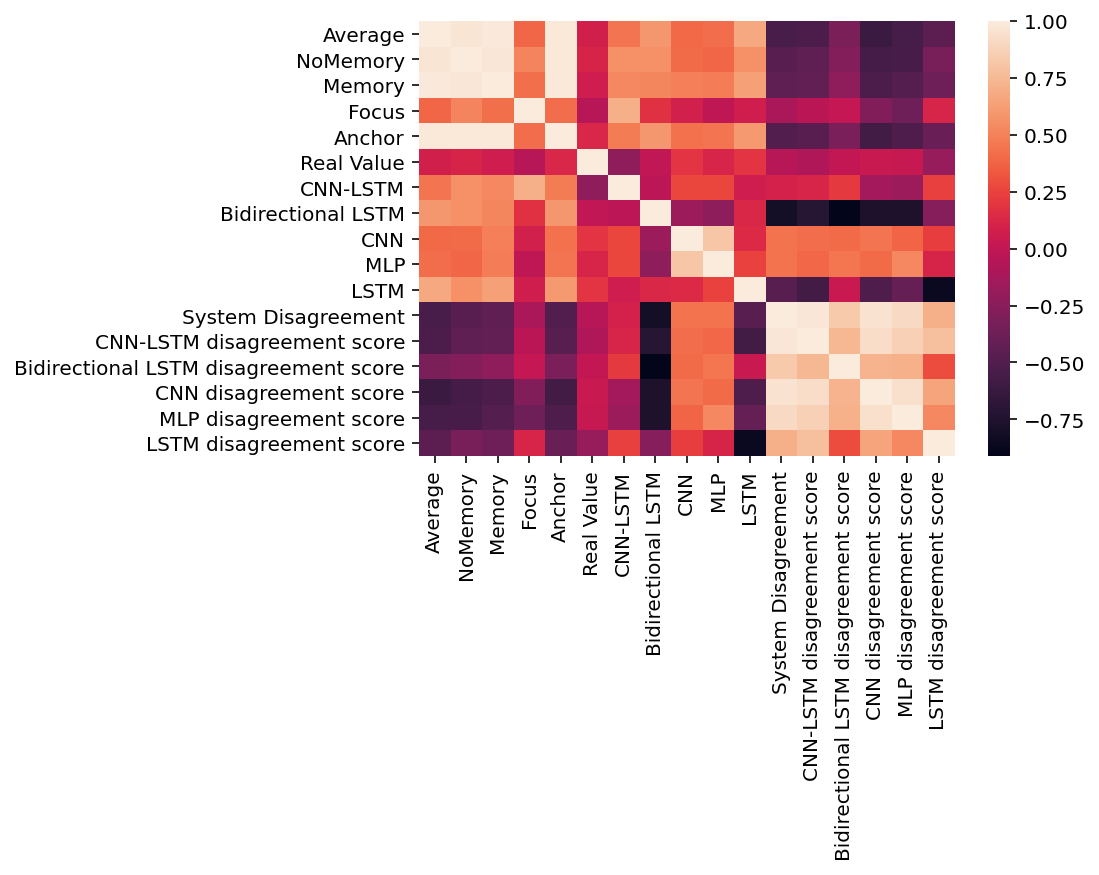

In [42]:
mat3 = correlation(yu3, True)

,Algorithms,MSE
0,Average,3.929127
1,NoMemory,2.222062
2,Memory,2.829538
3,Focus,0.457158
4,Anchor,2.033625
5,CNN-LSTM,14.893194
6,MLP,0.425638
7,CNN,4.074368


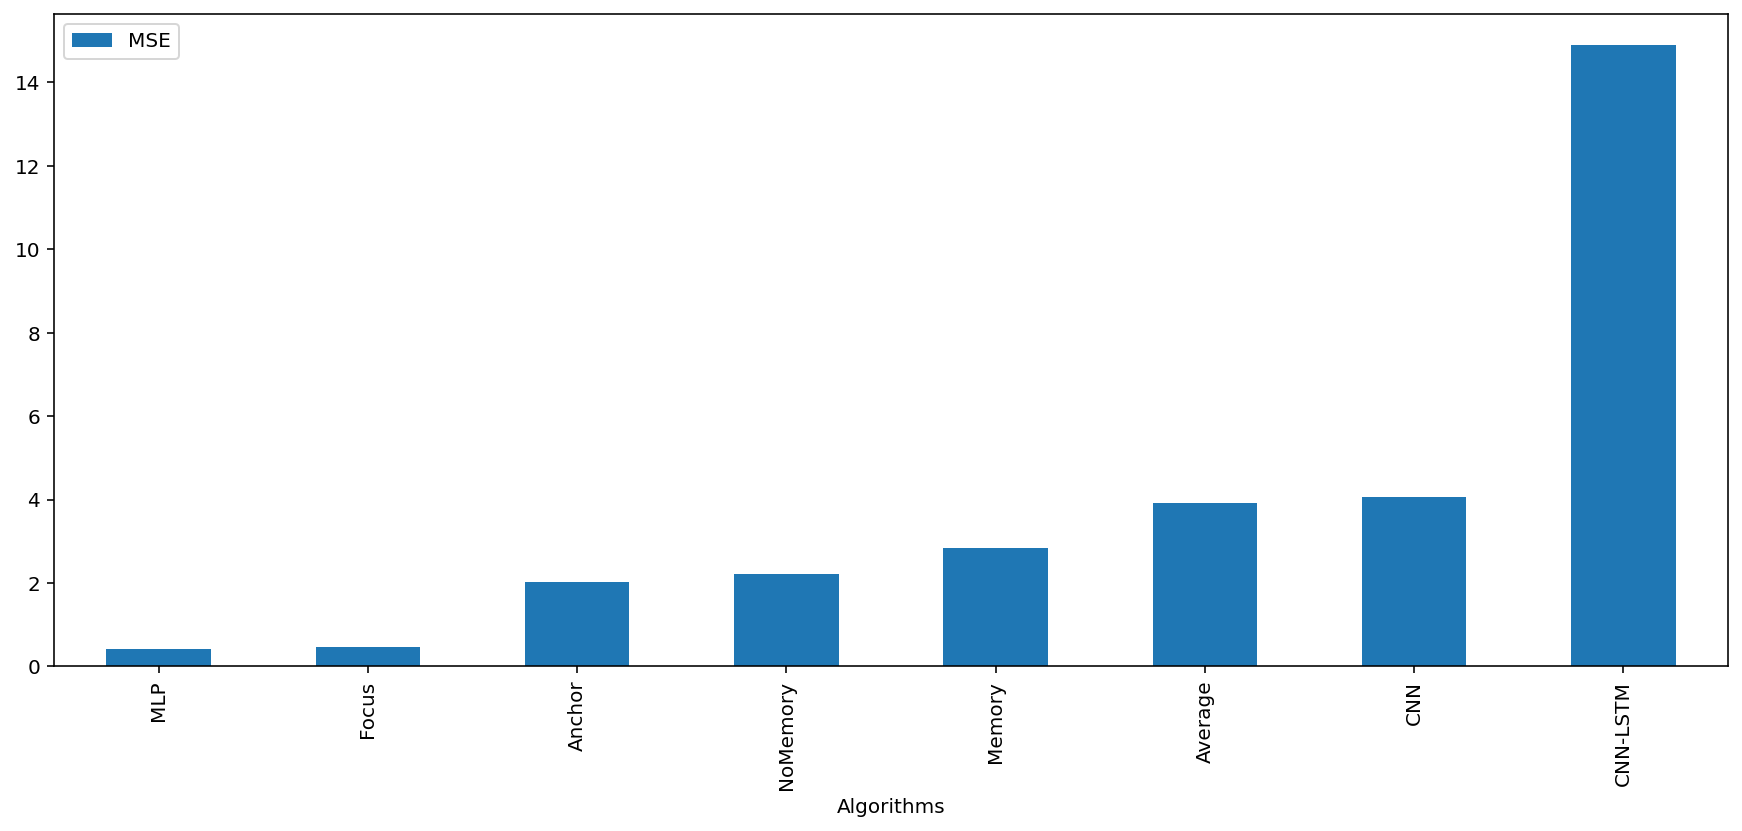

In [45]:
mse_score(ui6)

,Algorithms,MSE Log
0,Average,0.049239
1,NoMemory,0.026024
2,Memory,0.033840
3,Focus,0.004464
4,Anchor,0.023566
5,CNN-LSTM,0.257301
6,MLP,0.004128
7,CNN,0.050827


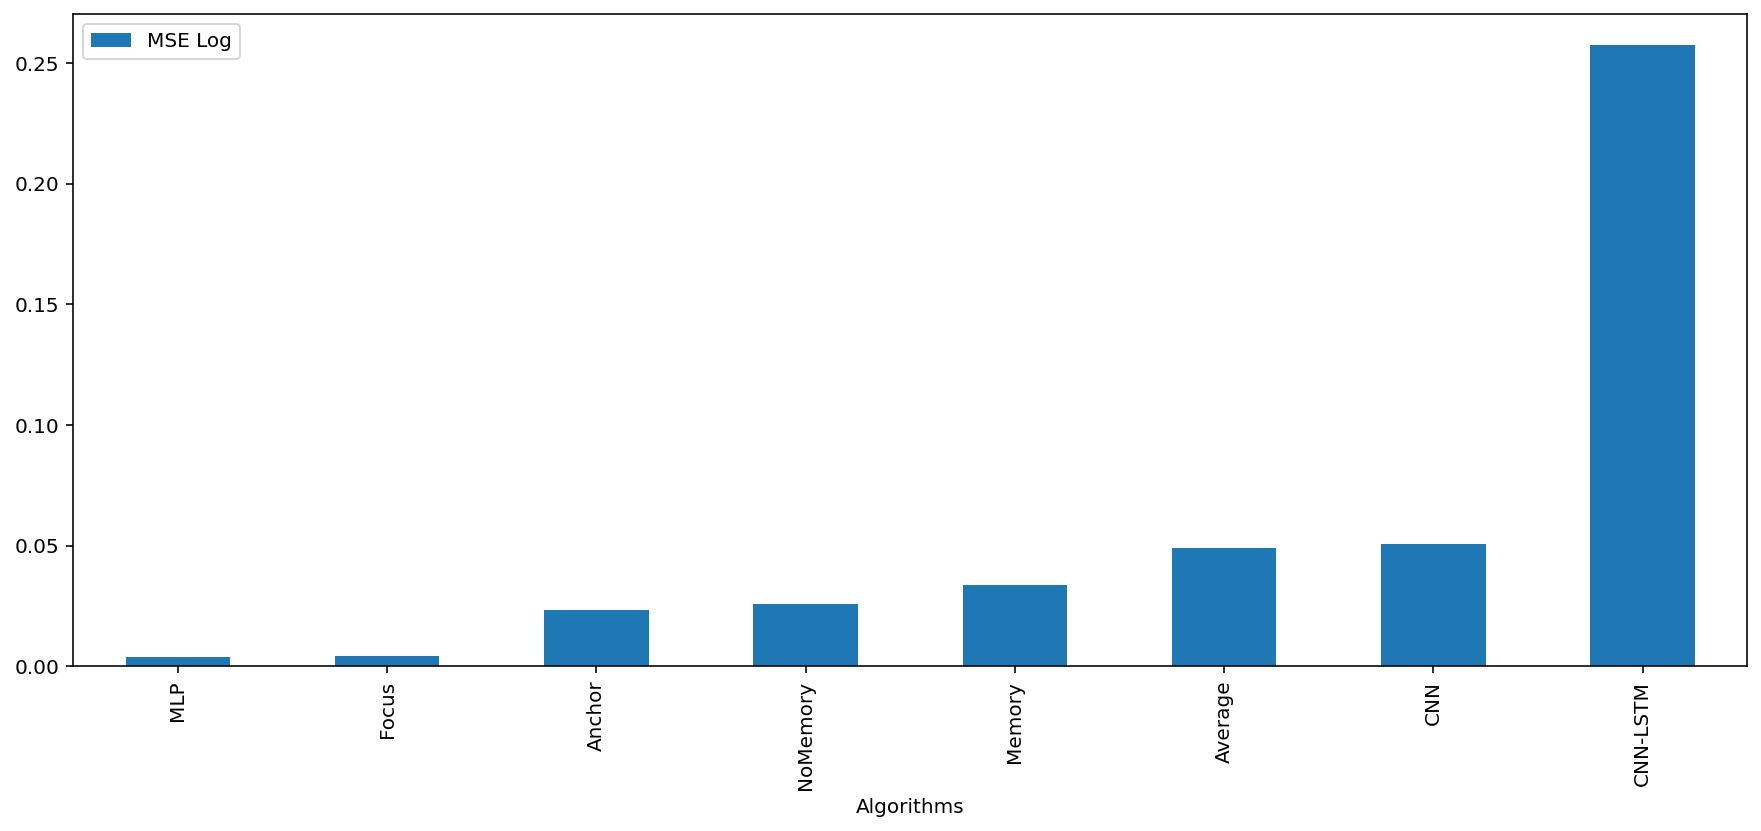

In [22]:
mse_log_score(ui6)

In [ ]:
mae_score(ui6)

In [ ]:
mse_score(ui2)

In [ ]:
mse_log_score(ui1)

In [ ]:
mae_score(ui2)

In [ ]:
mse_score(ui3)

In [ ]:
mse_log_score(ui3)

In [ ]:
mae_score(ui3)

In [ ]:
plot_performance(ui1)

In [ ]:
plot_performance(ui2)

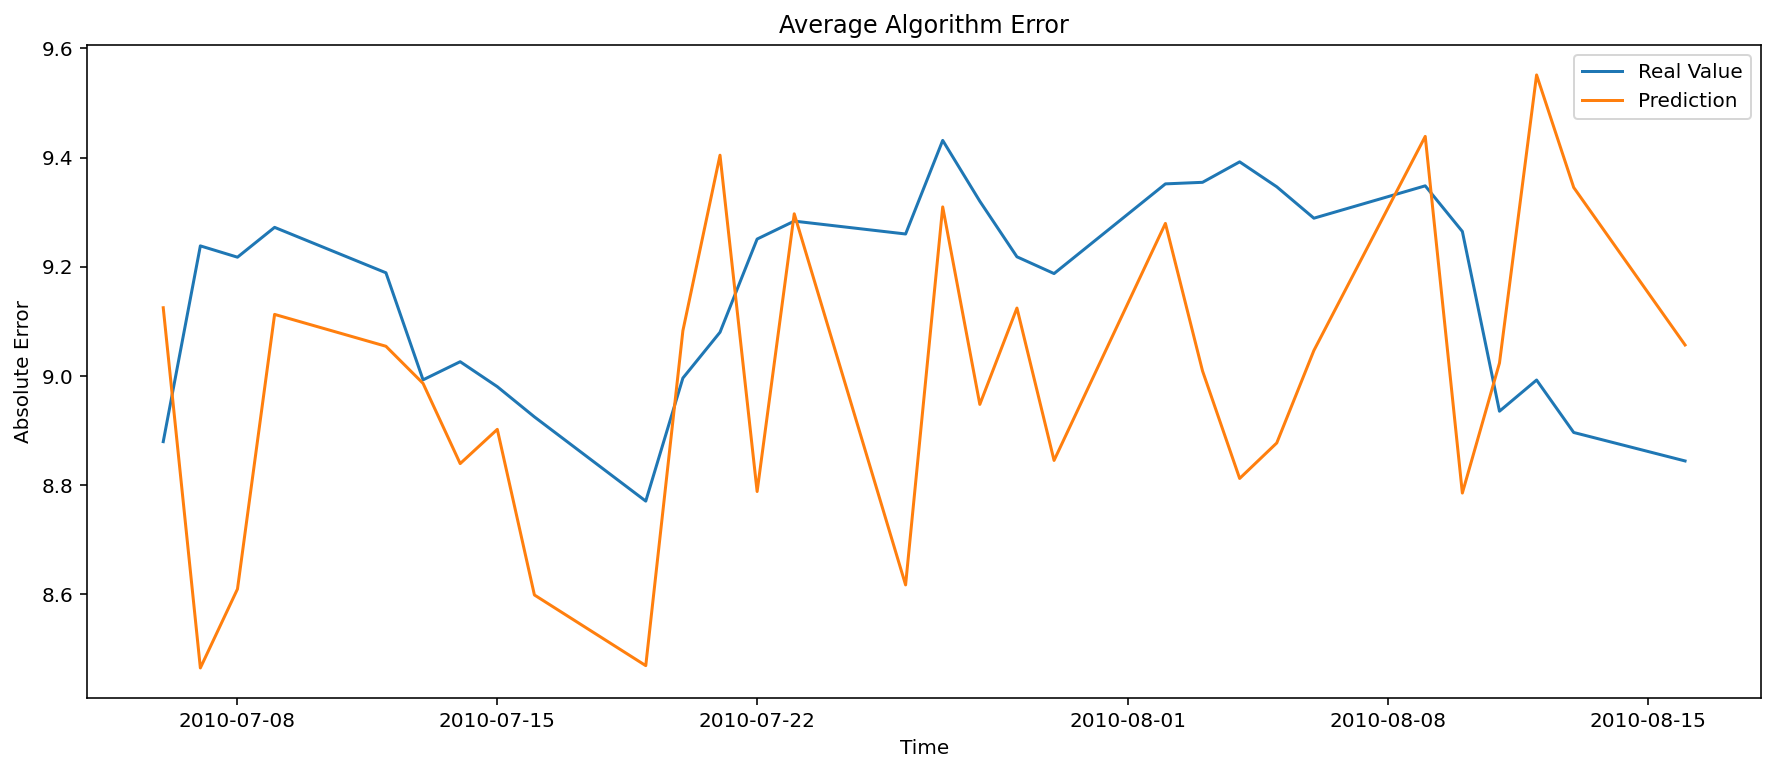

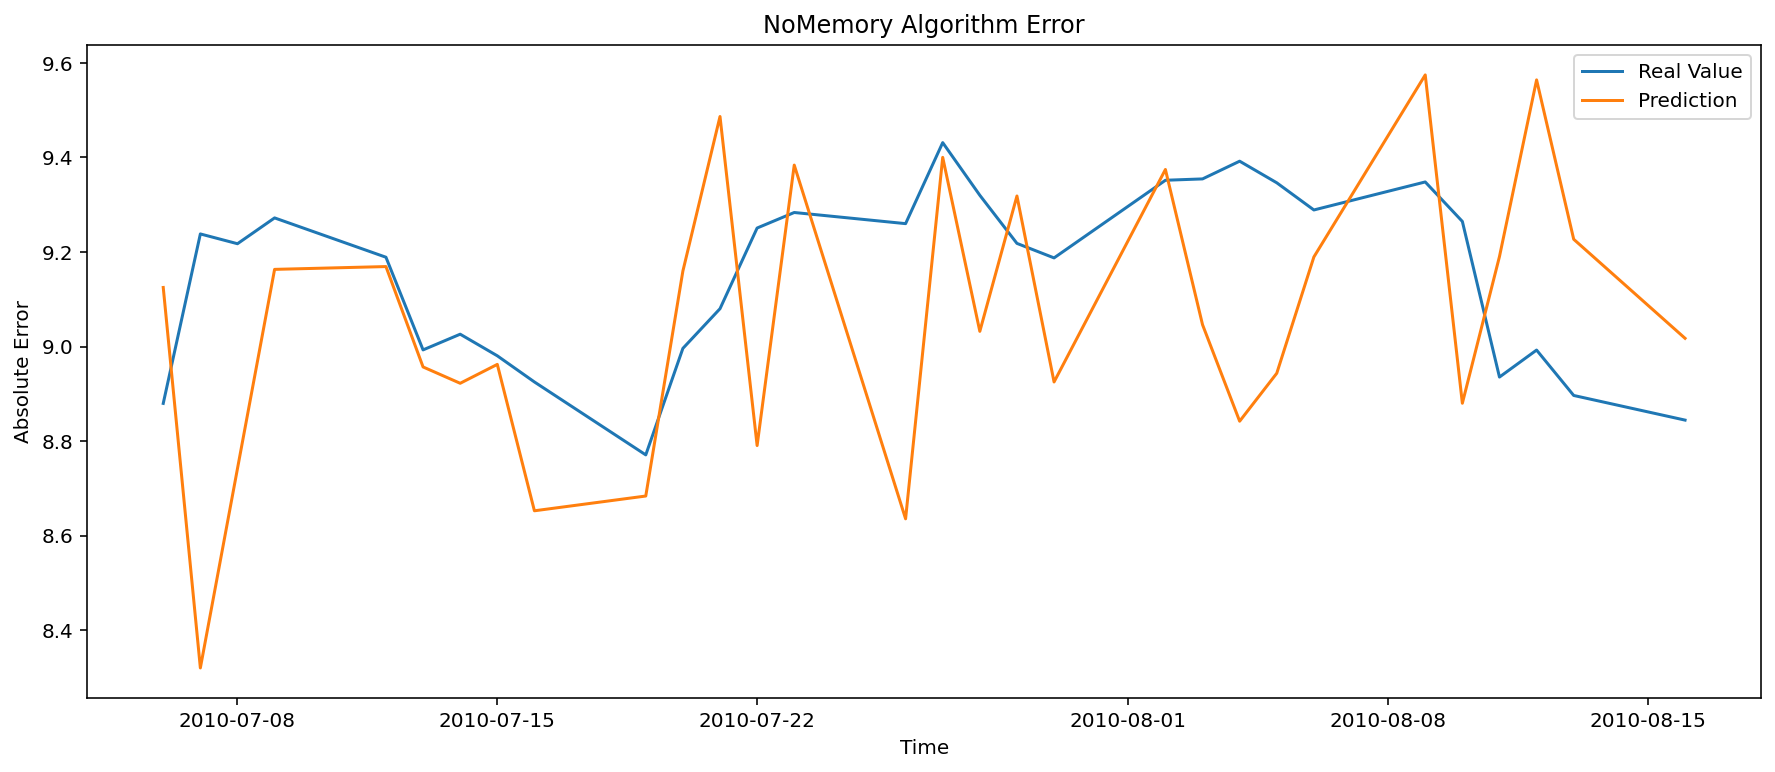

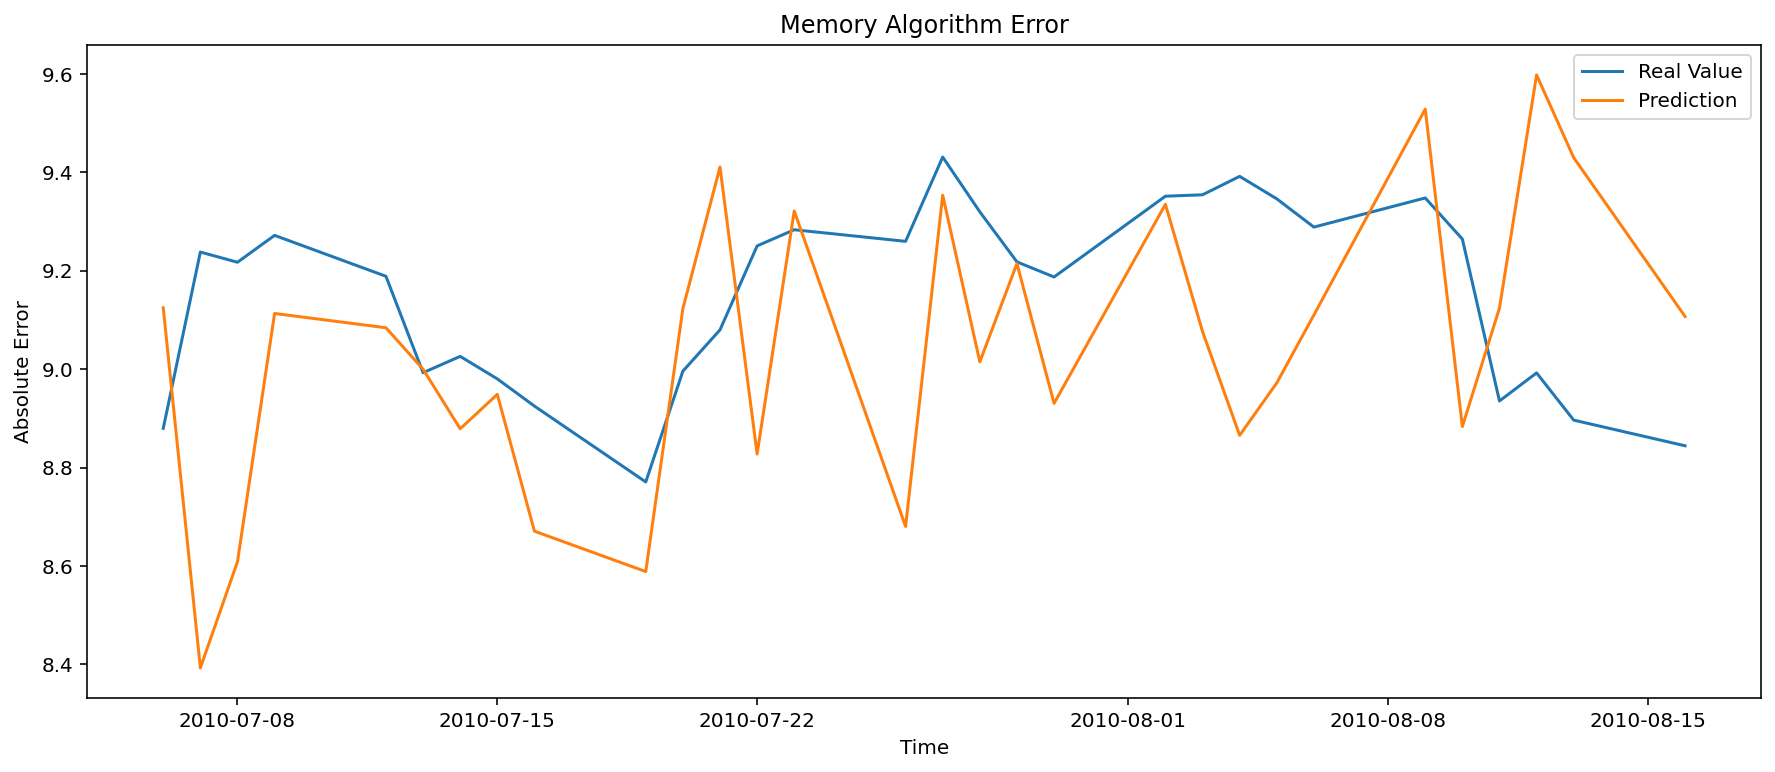

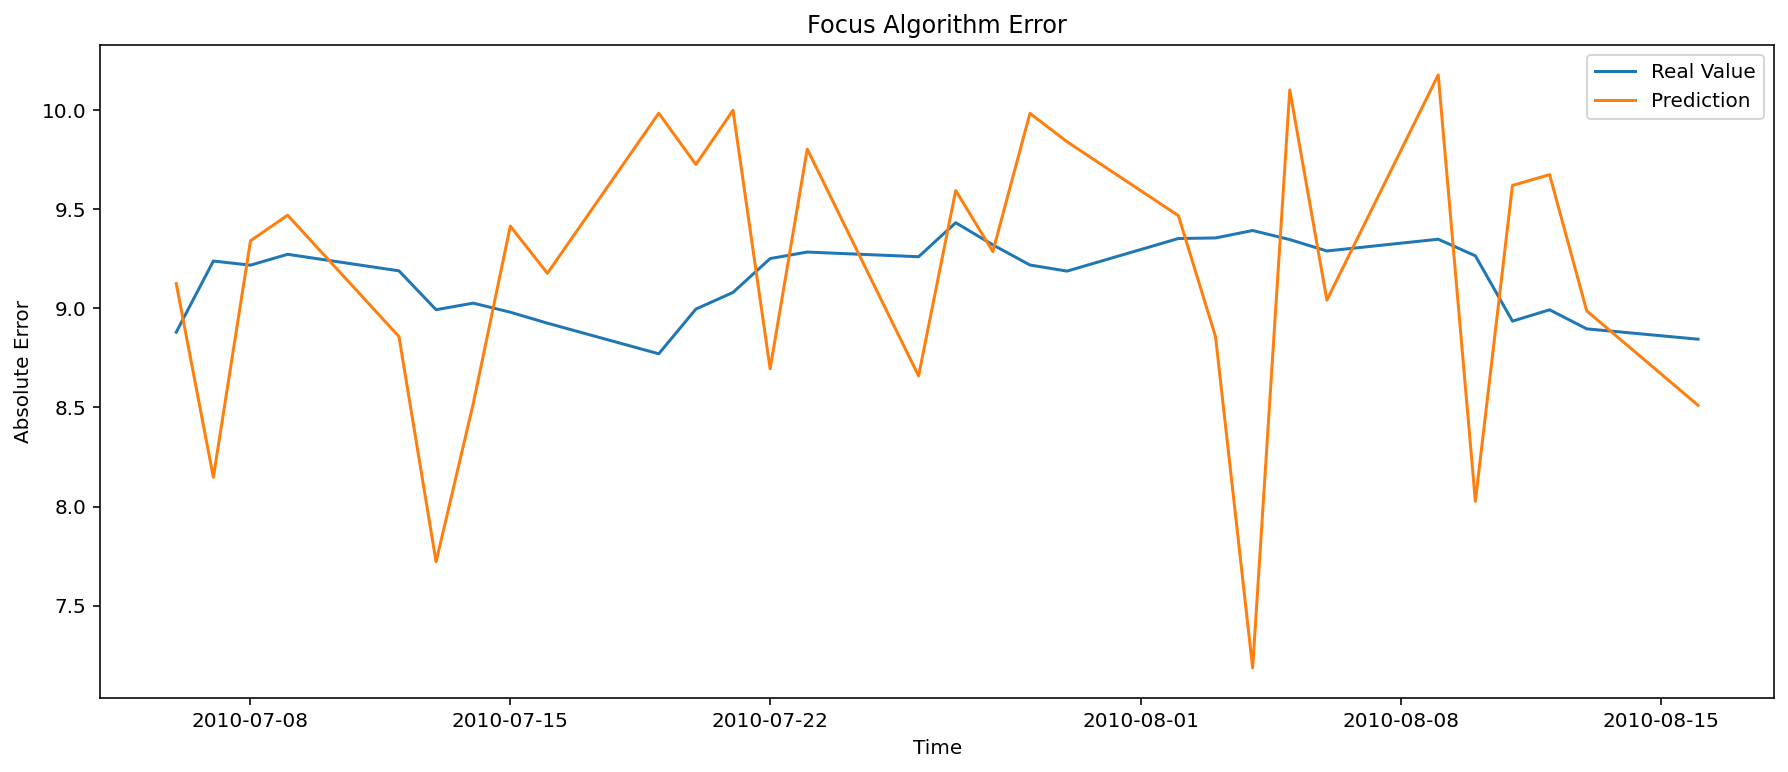

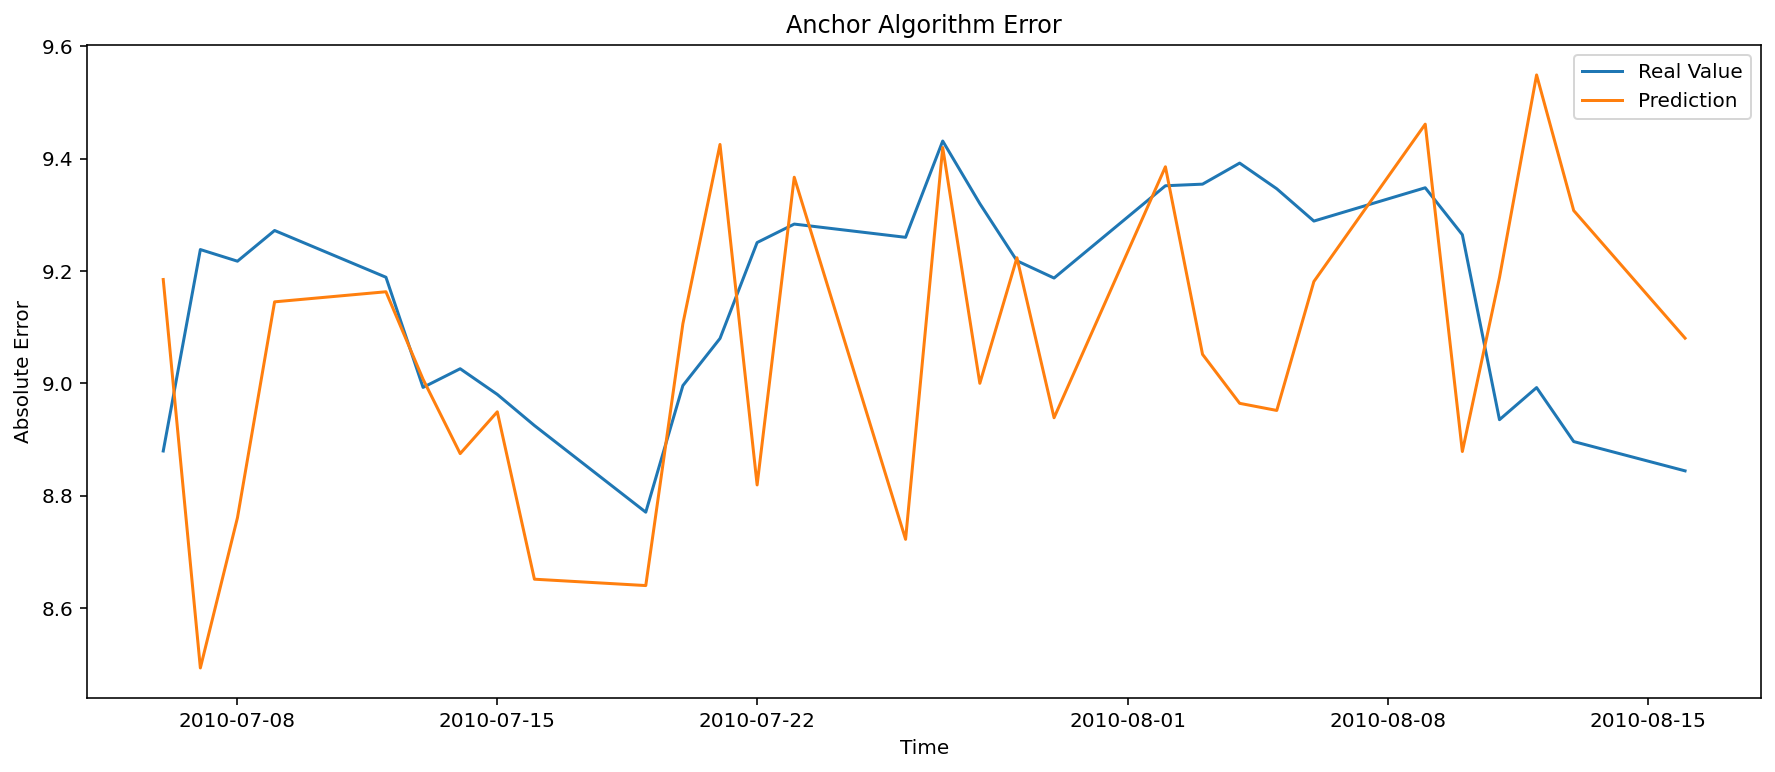

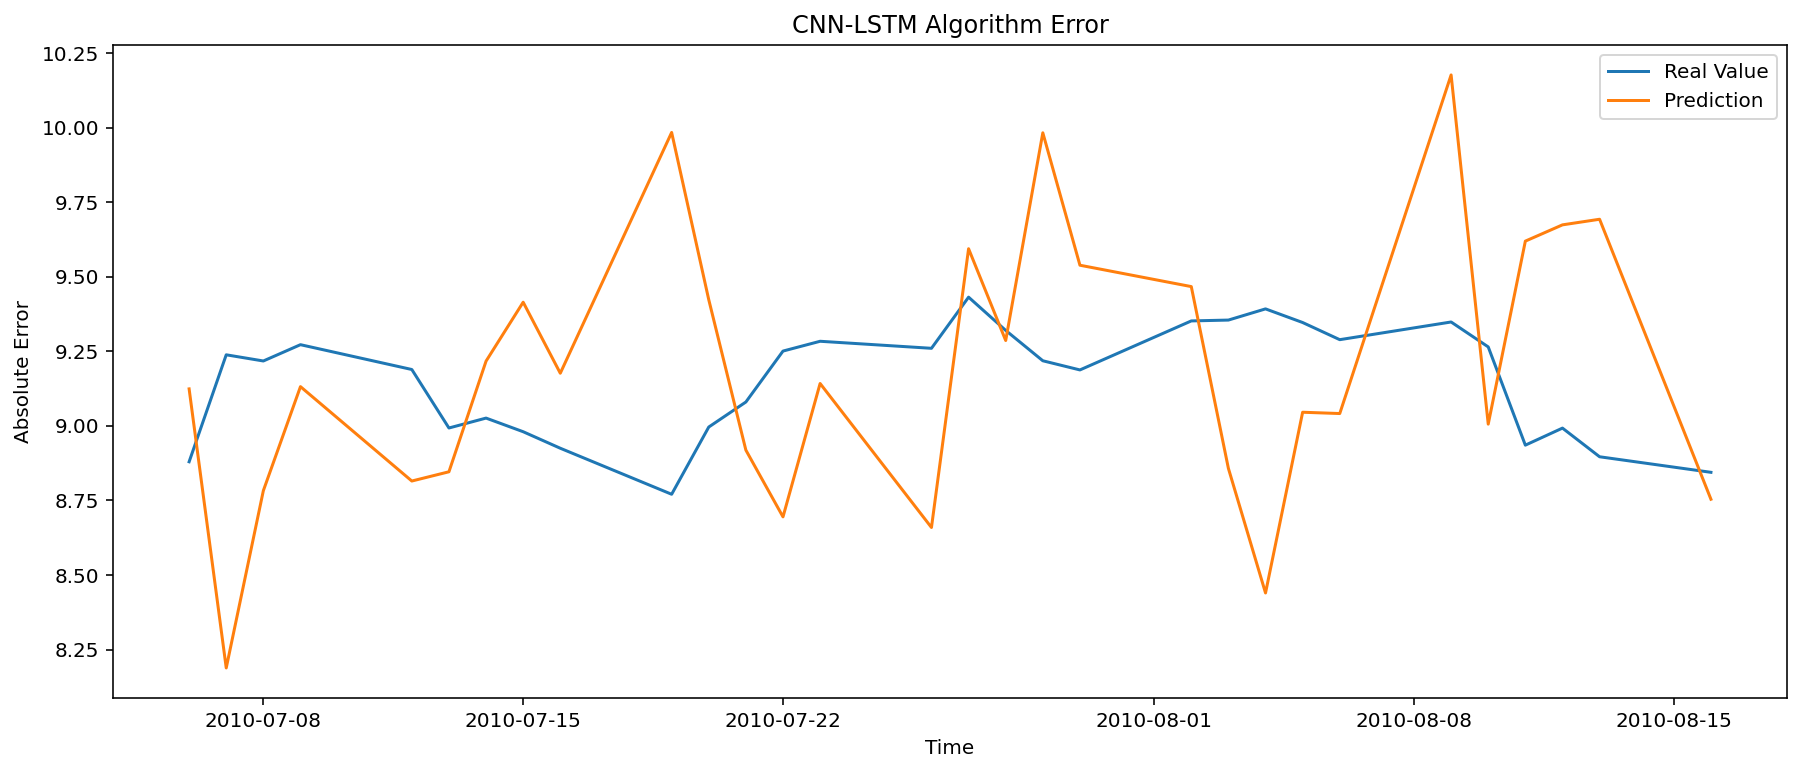

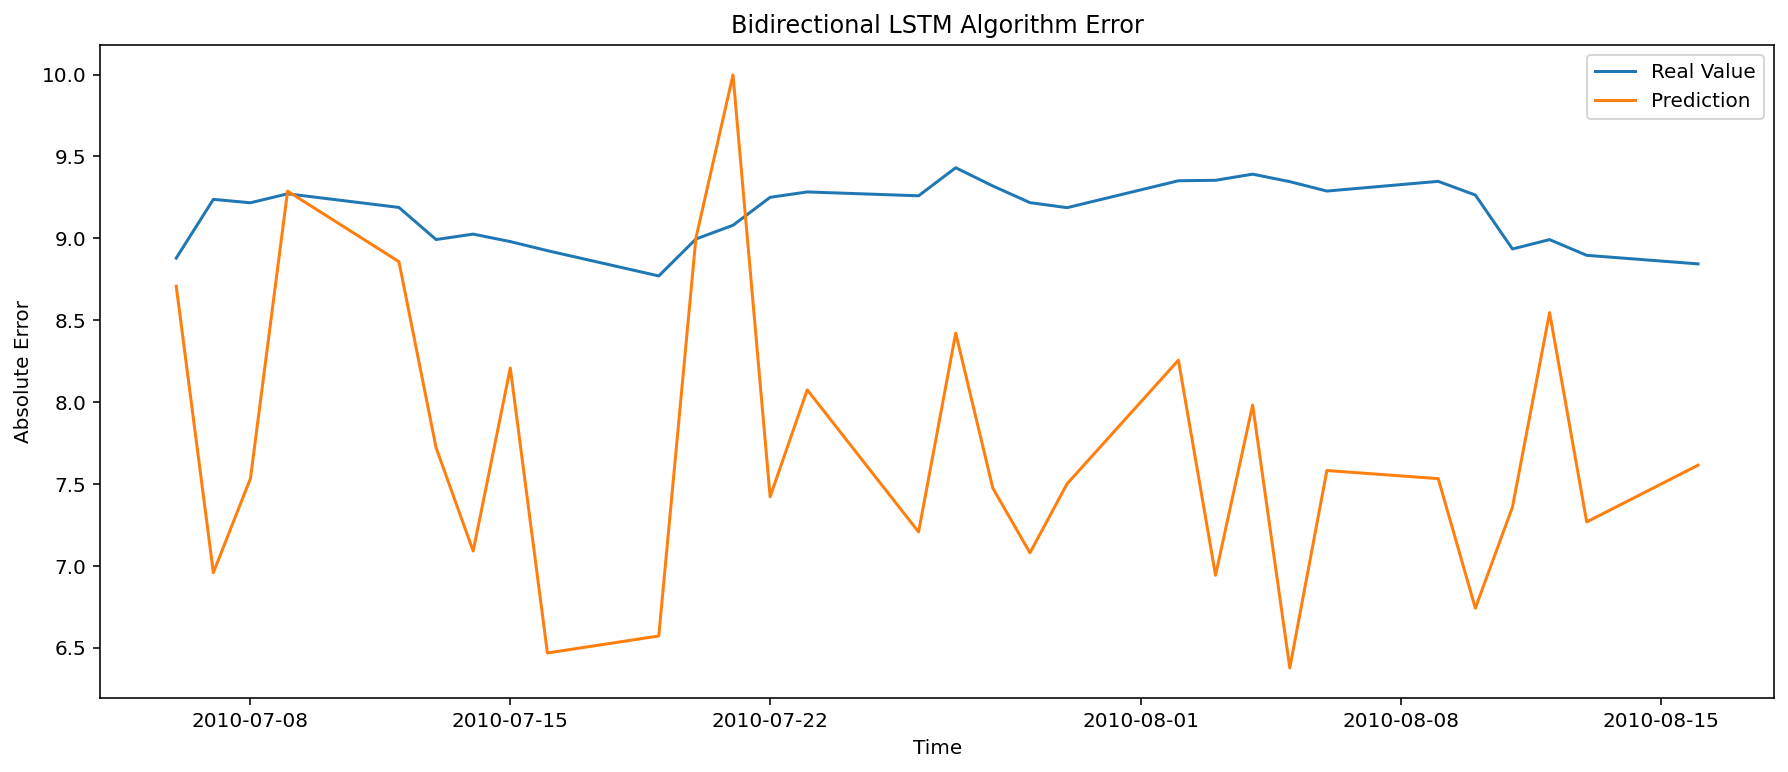

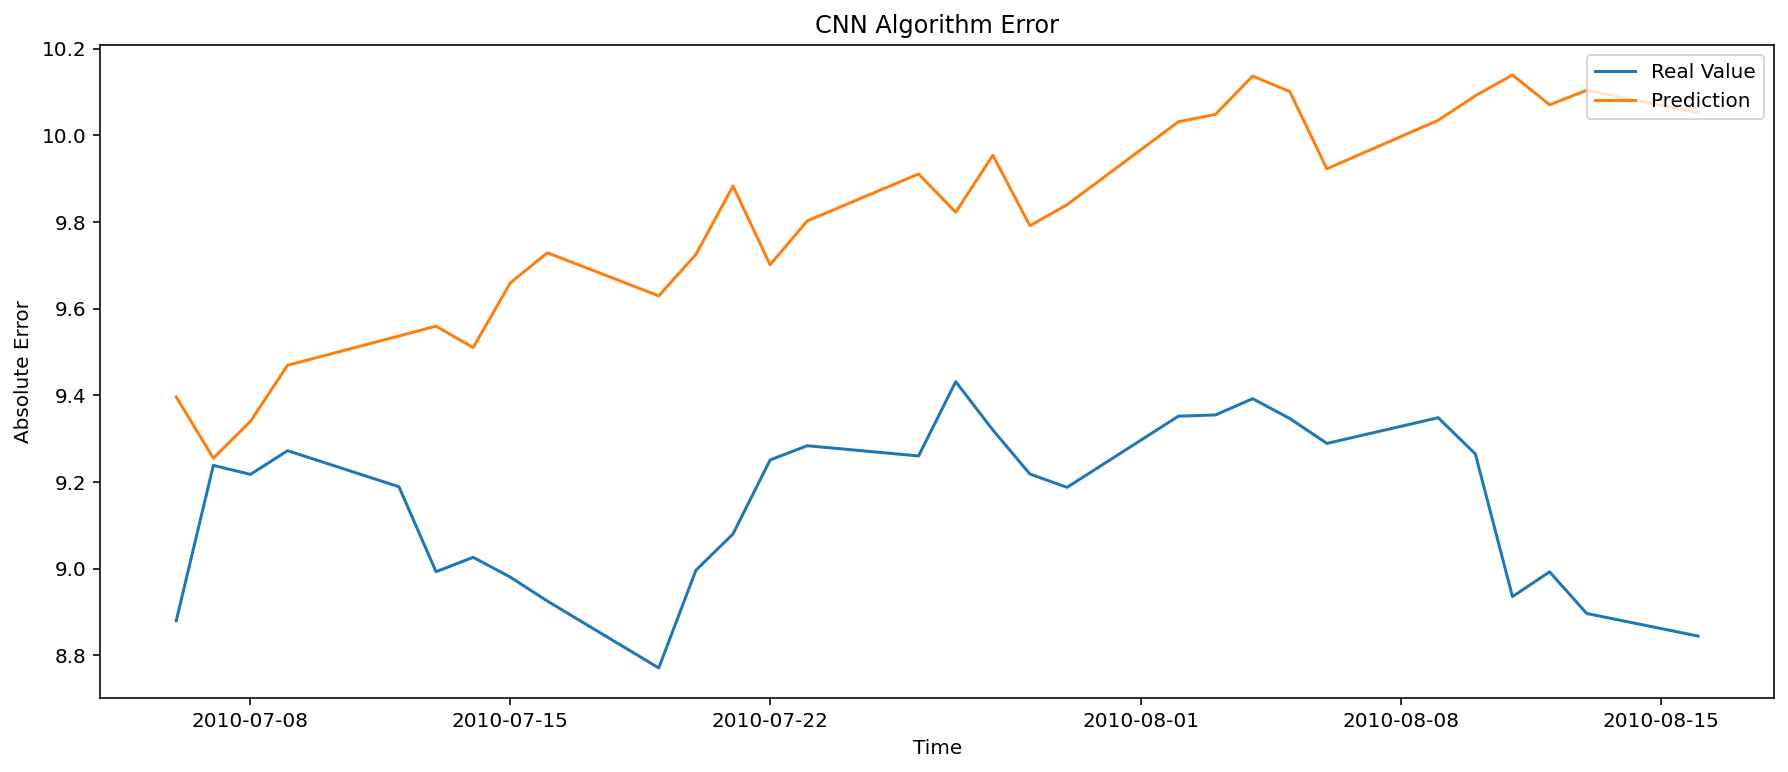

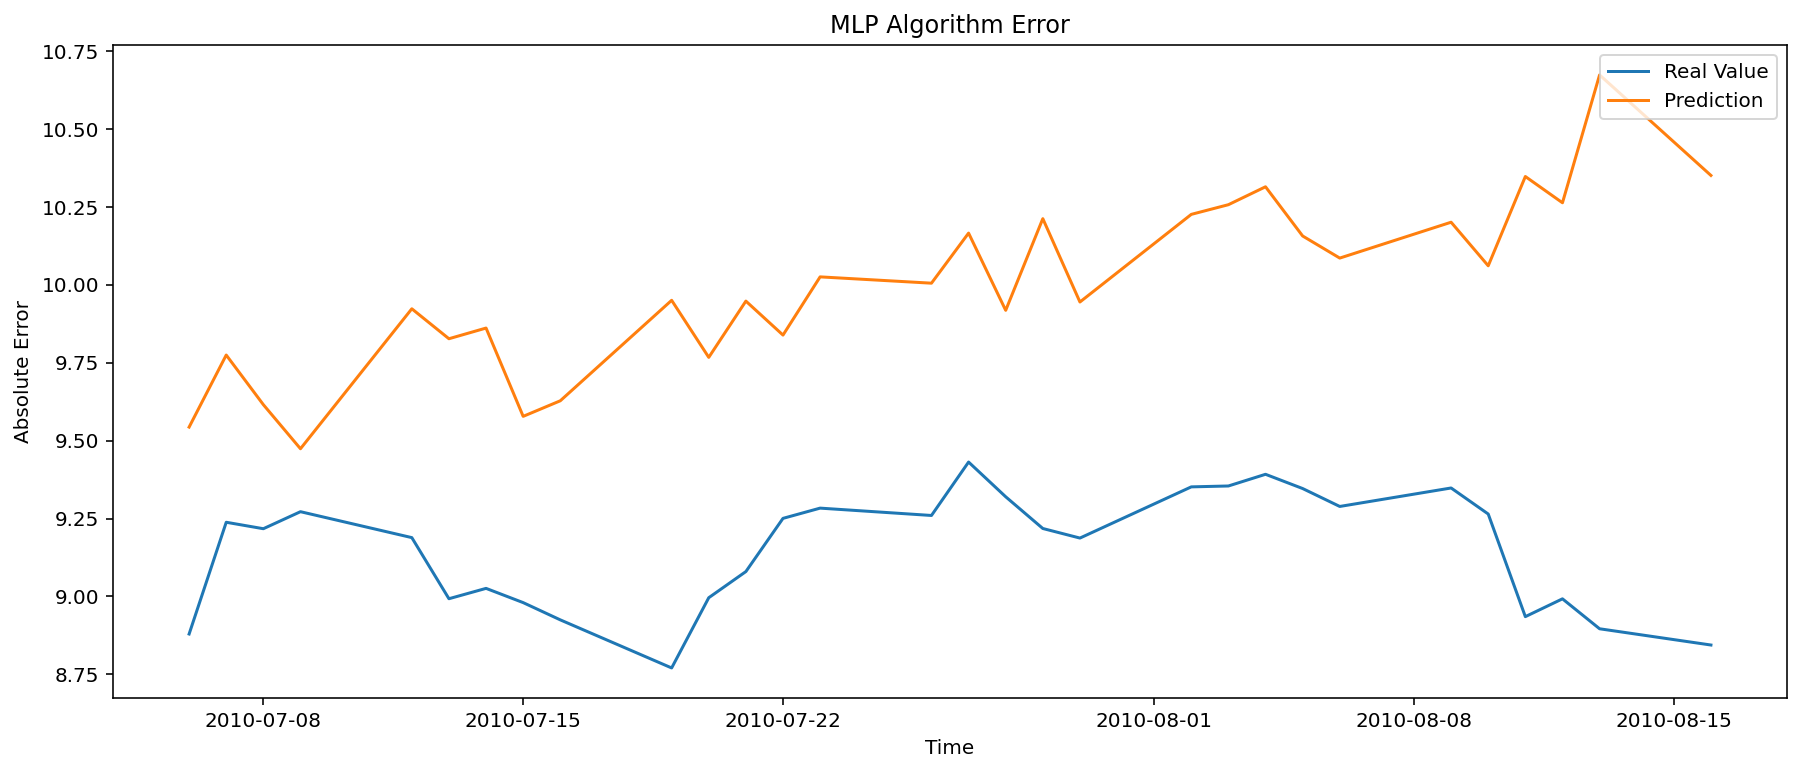

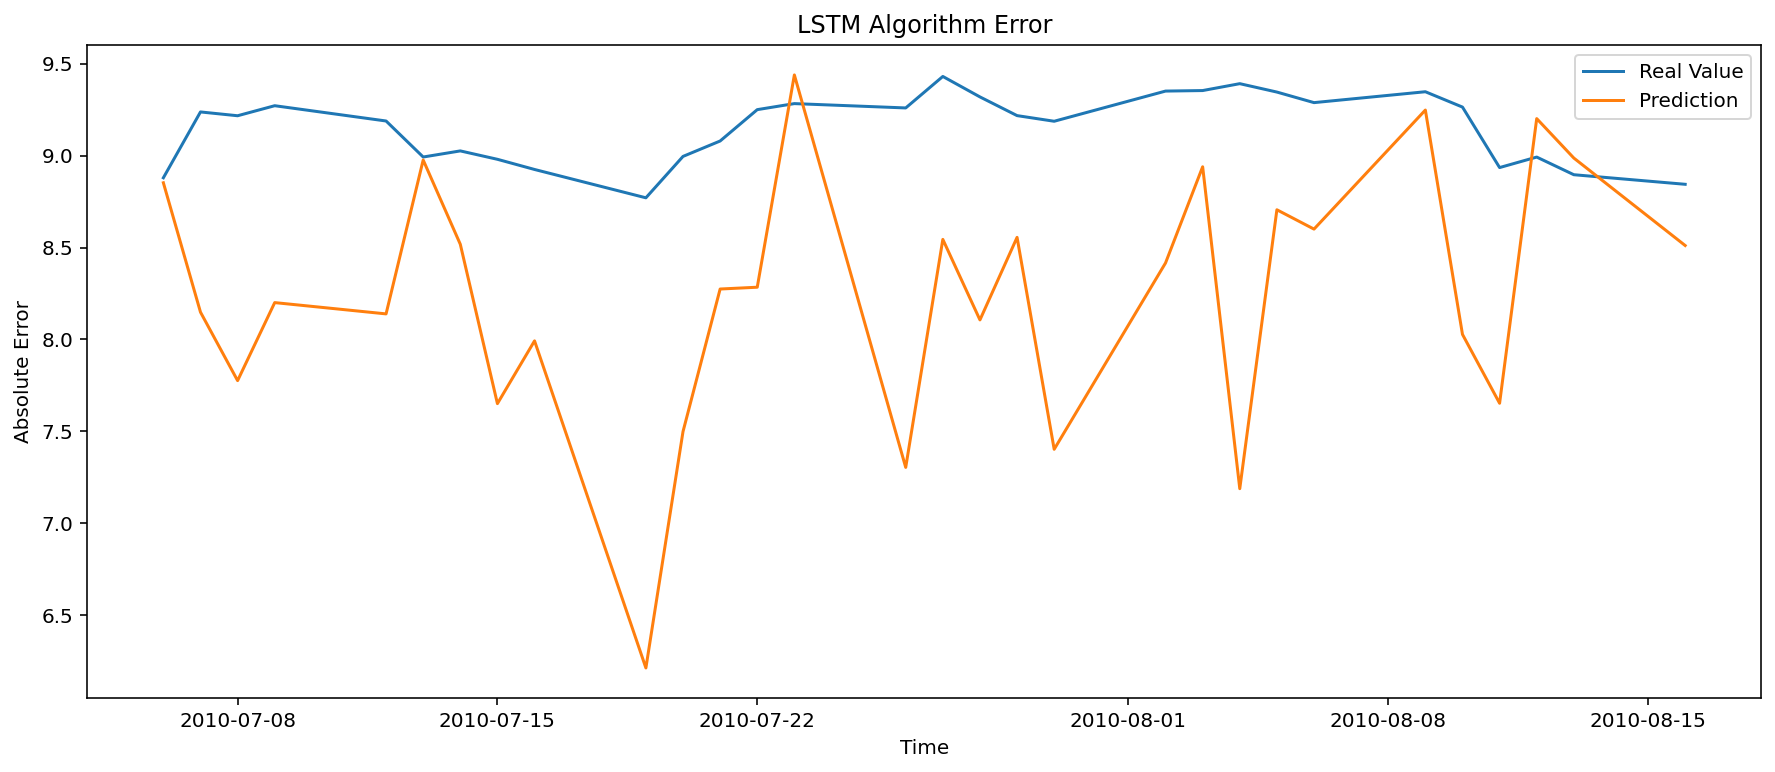

In [43]:
plot_performance(ui3)

In [ ]:
plot_performance(ui4)

In [ ]:
plot_performance(ui5)

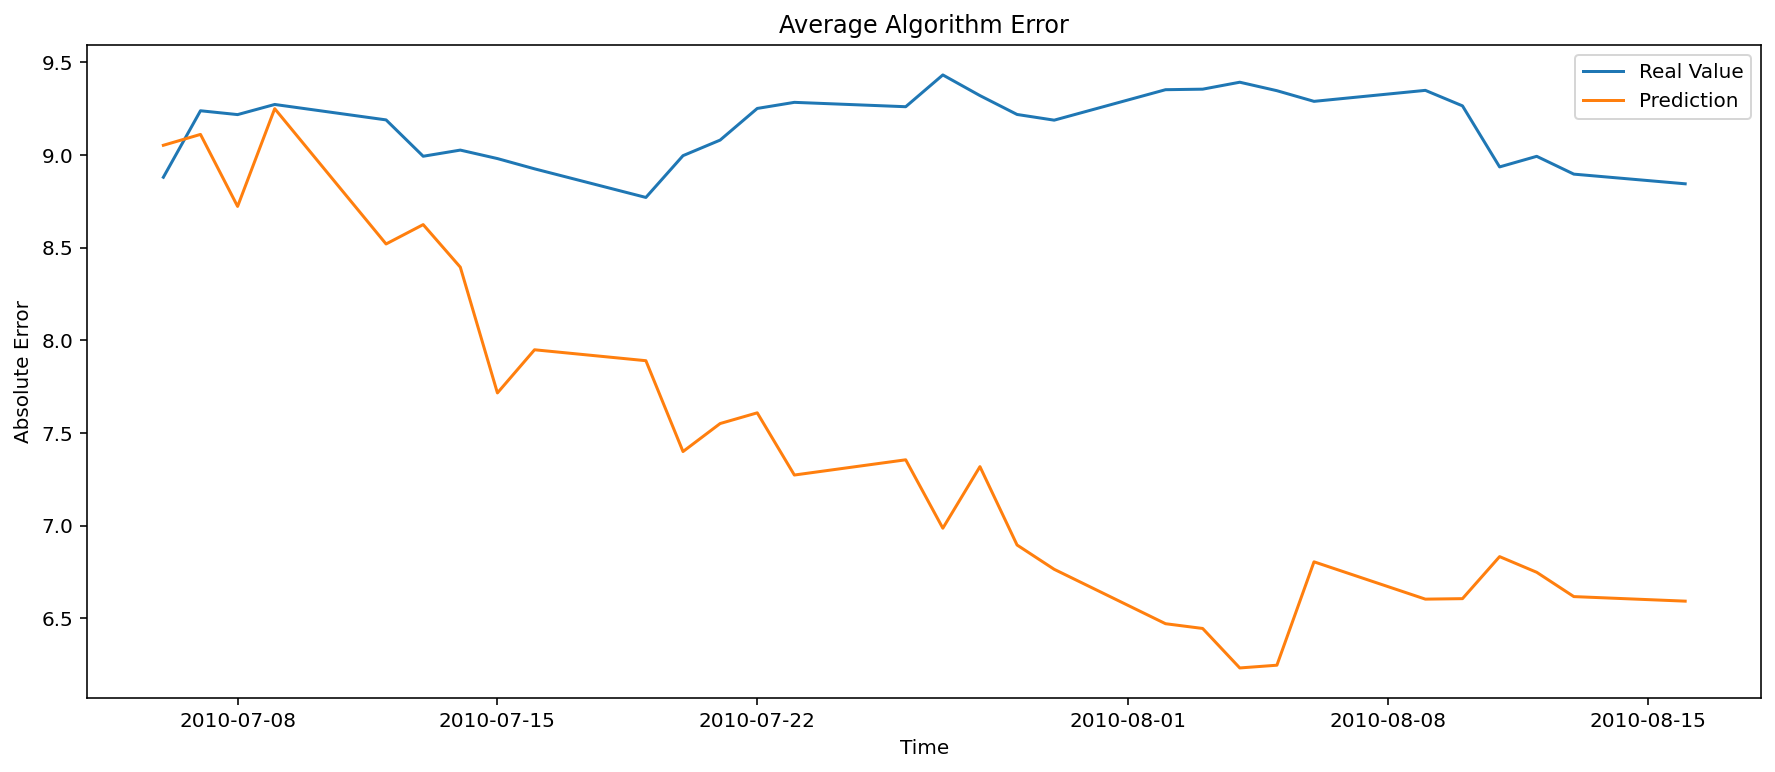

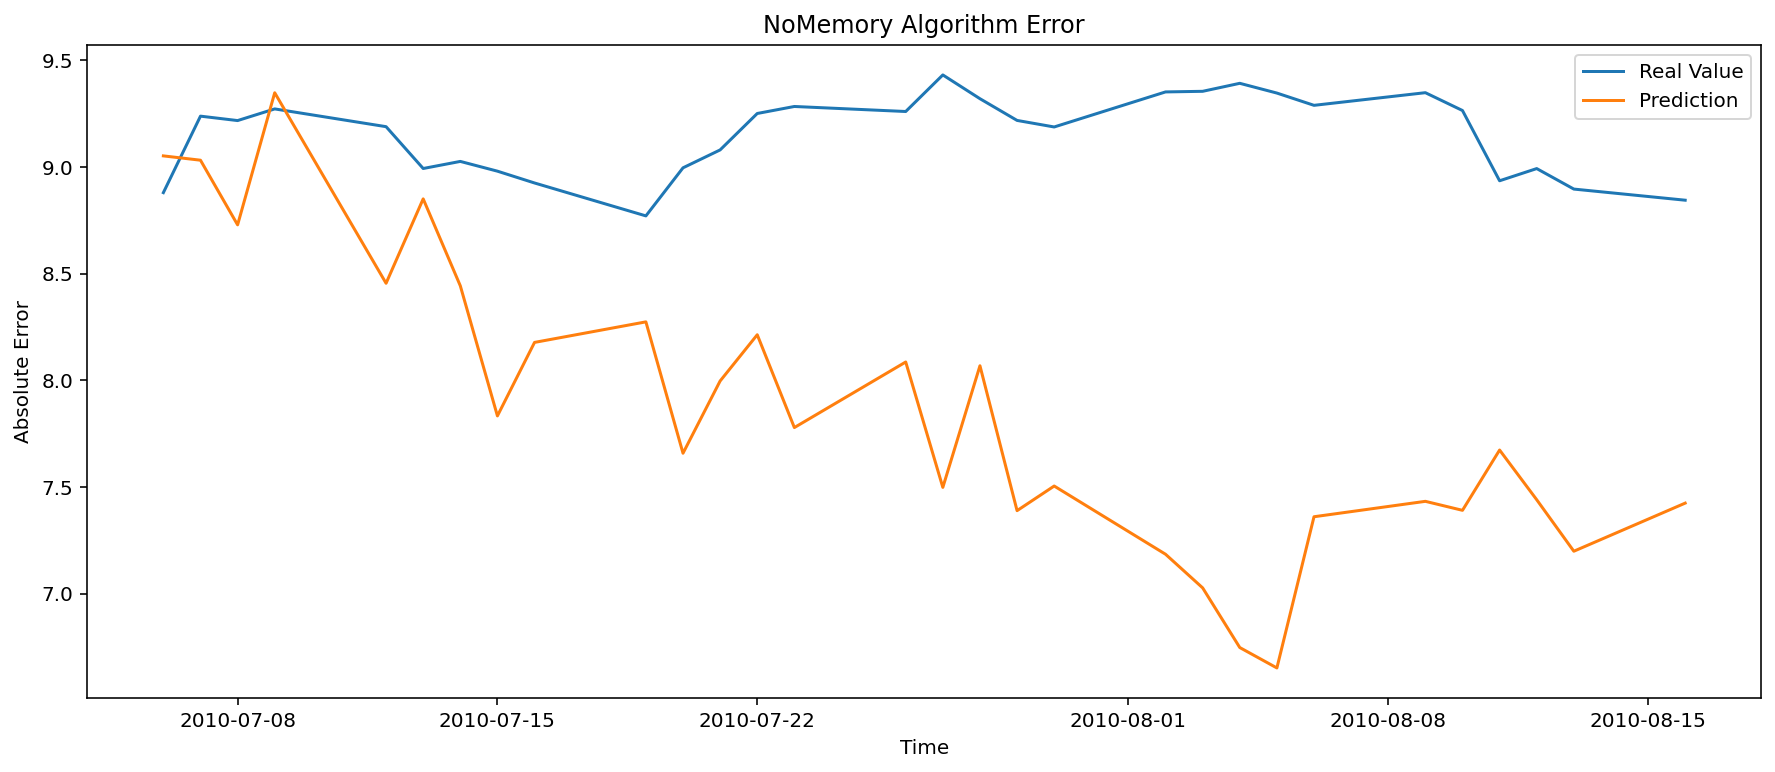

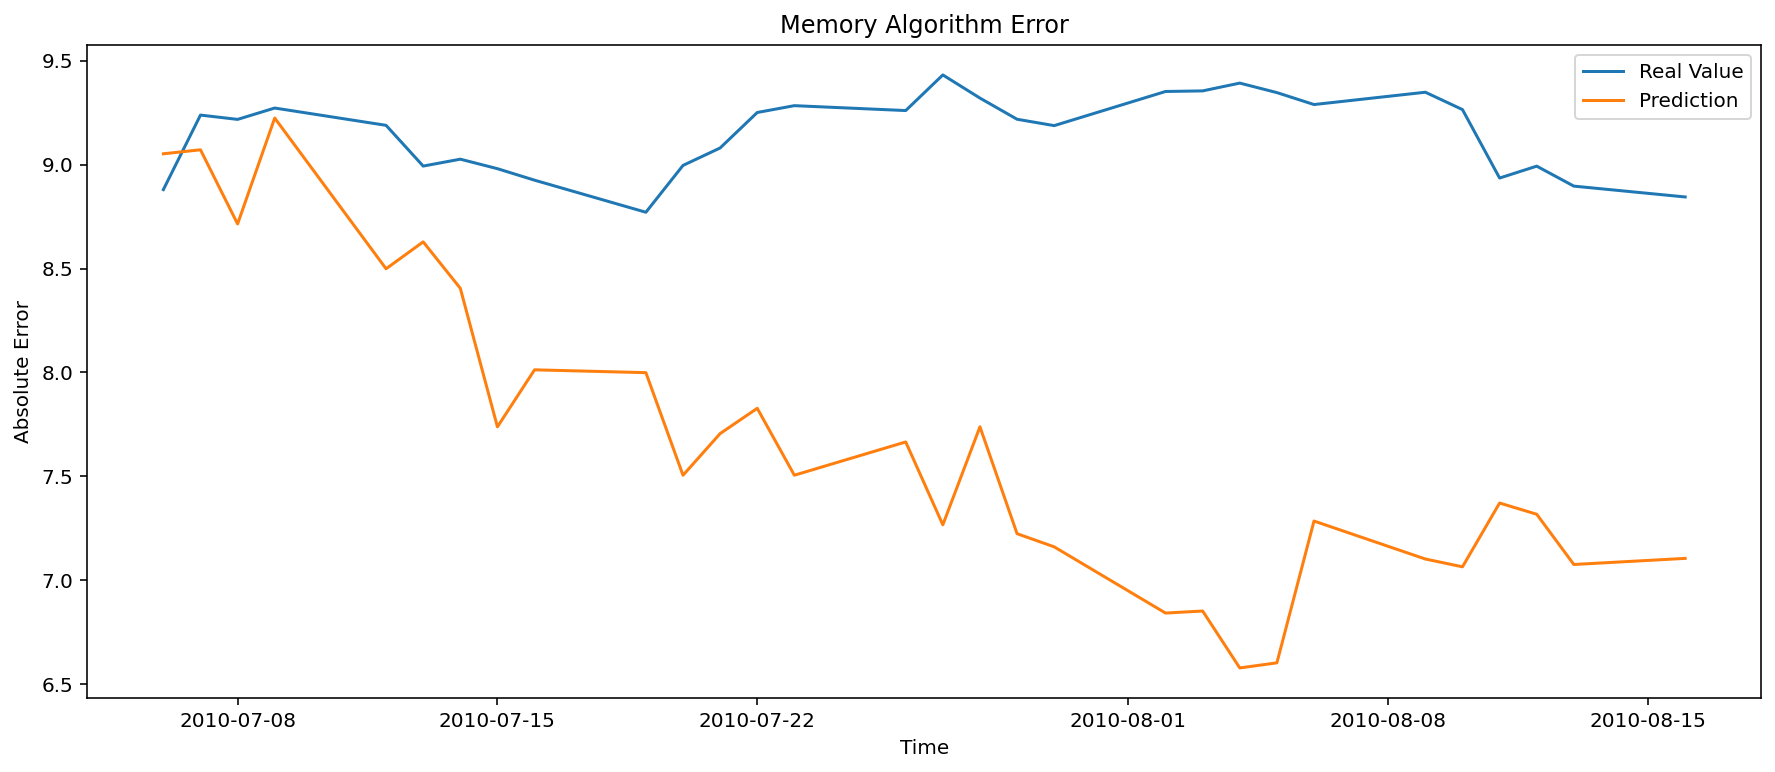

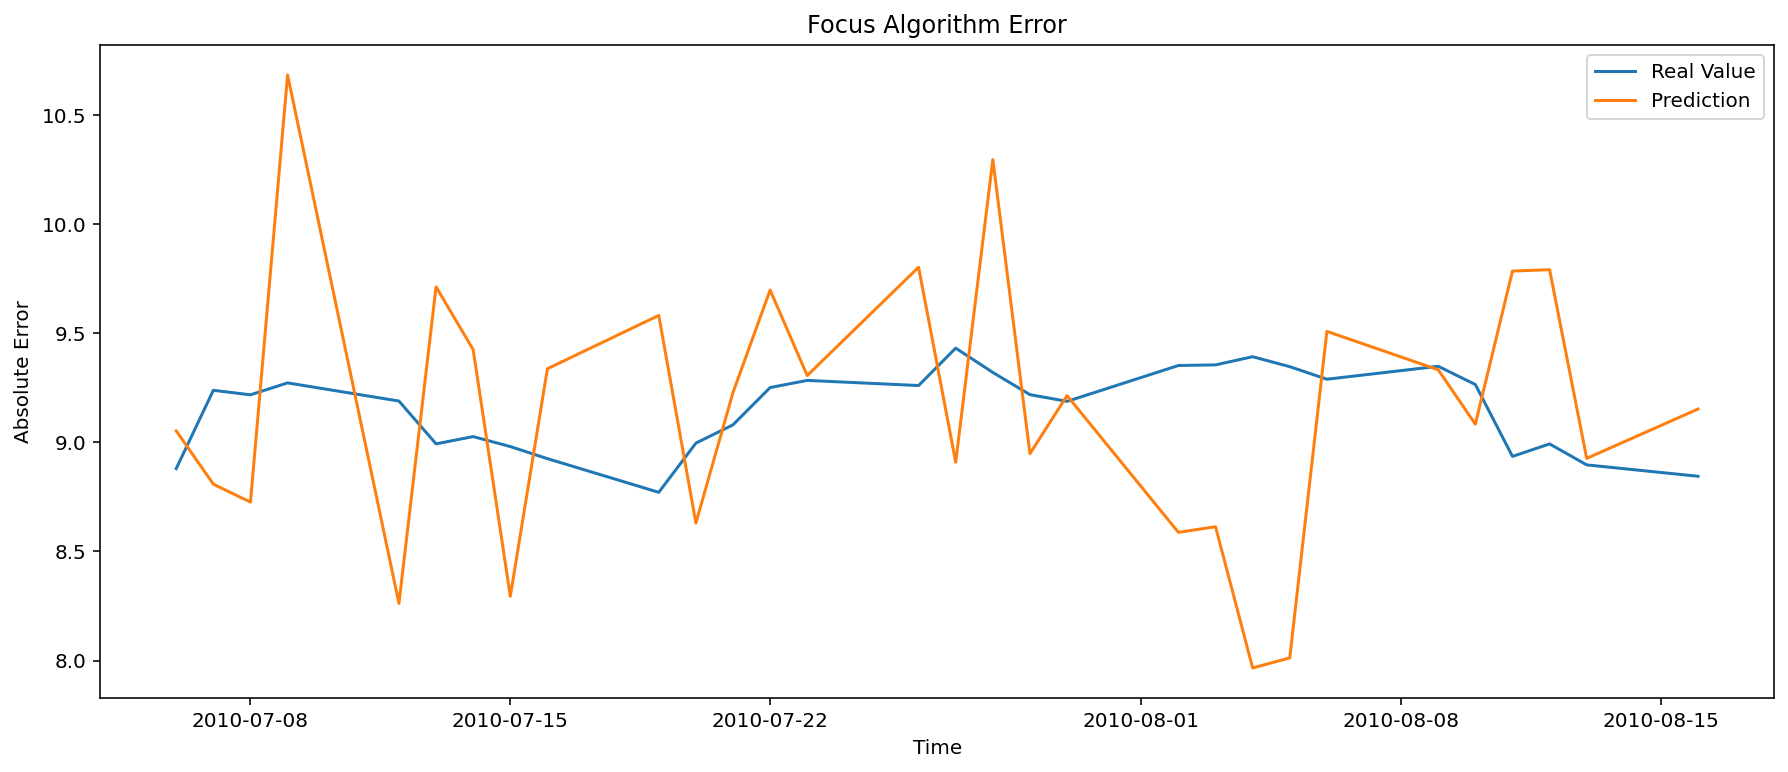

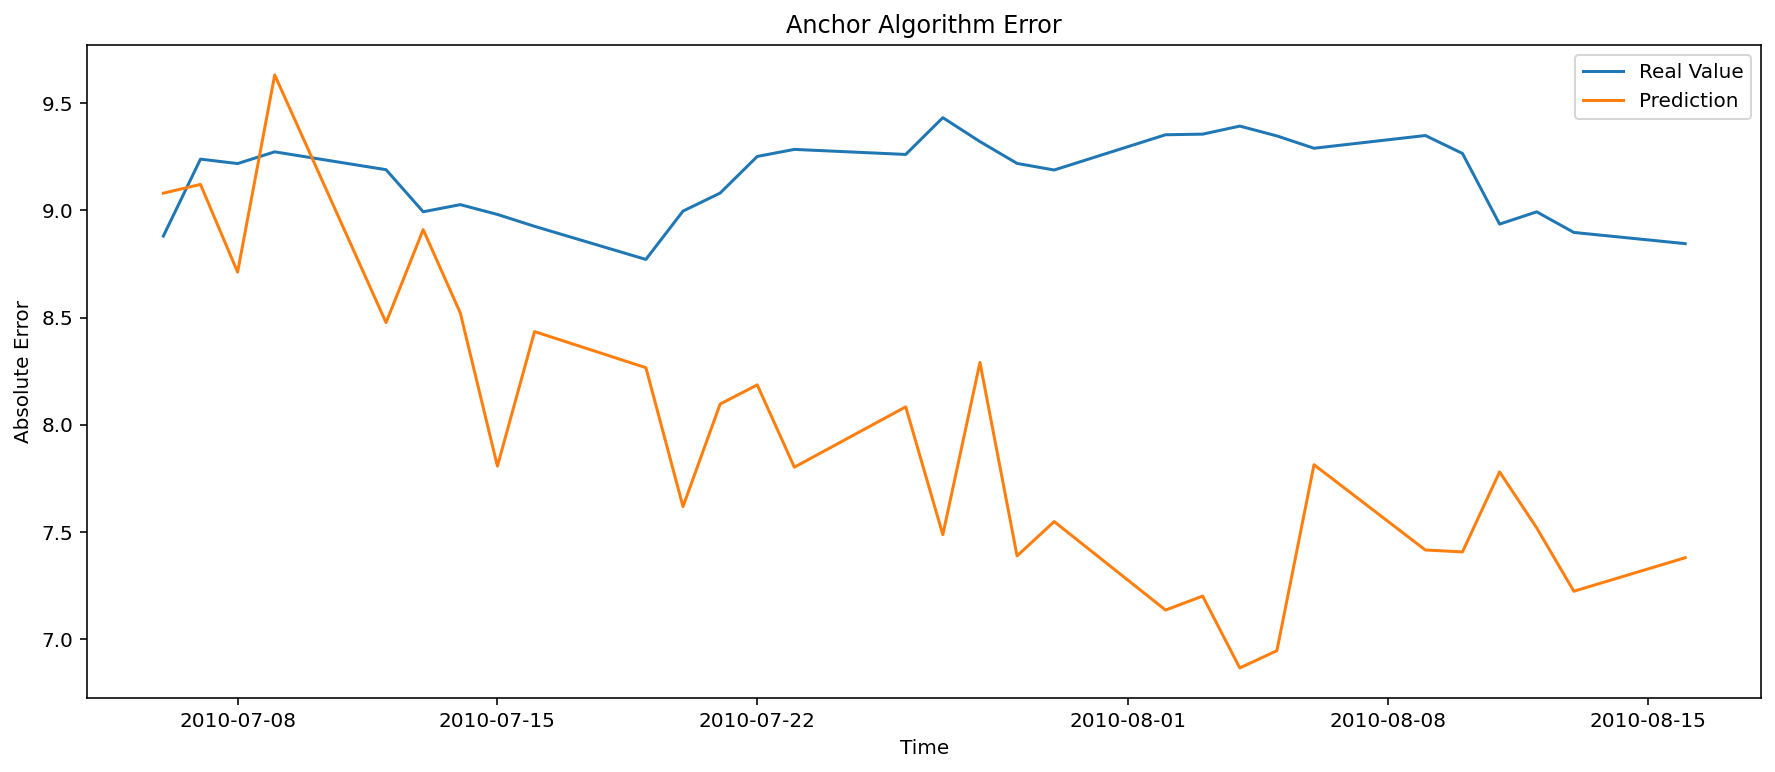

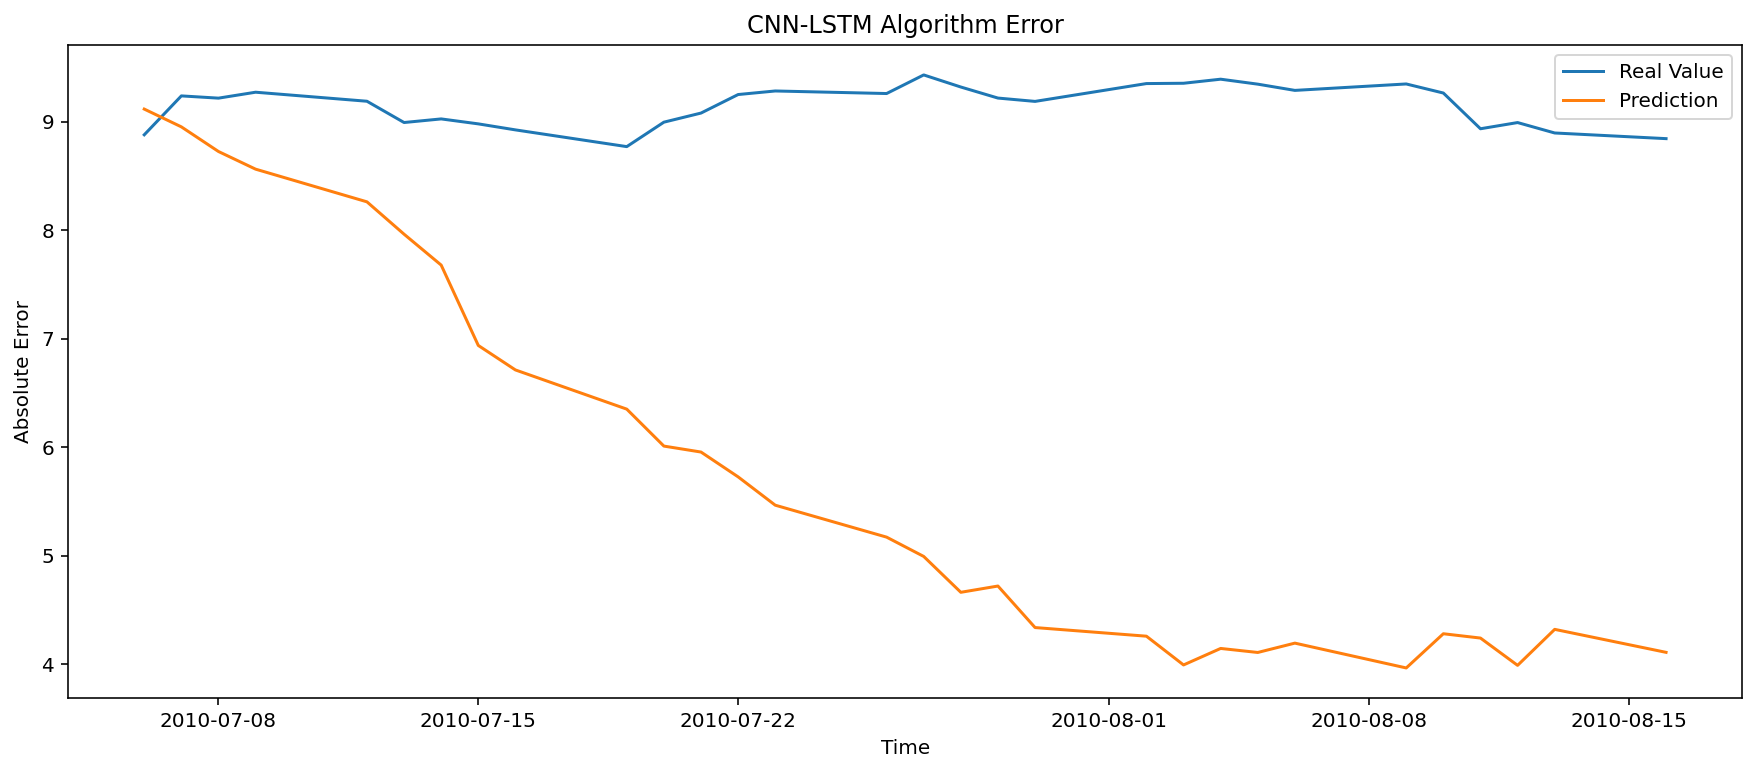

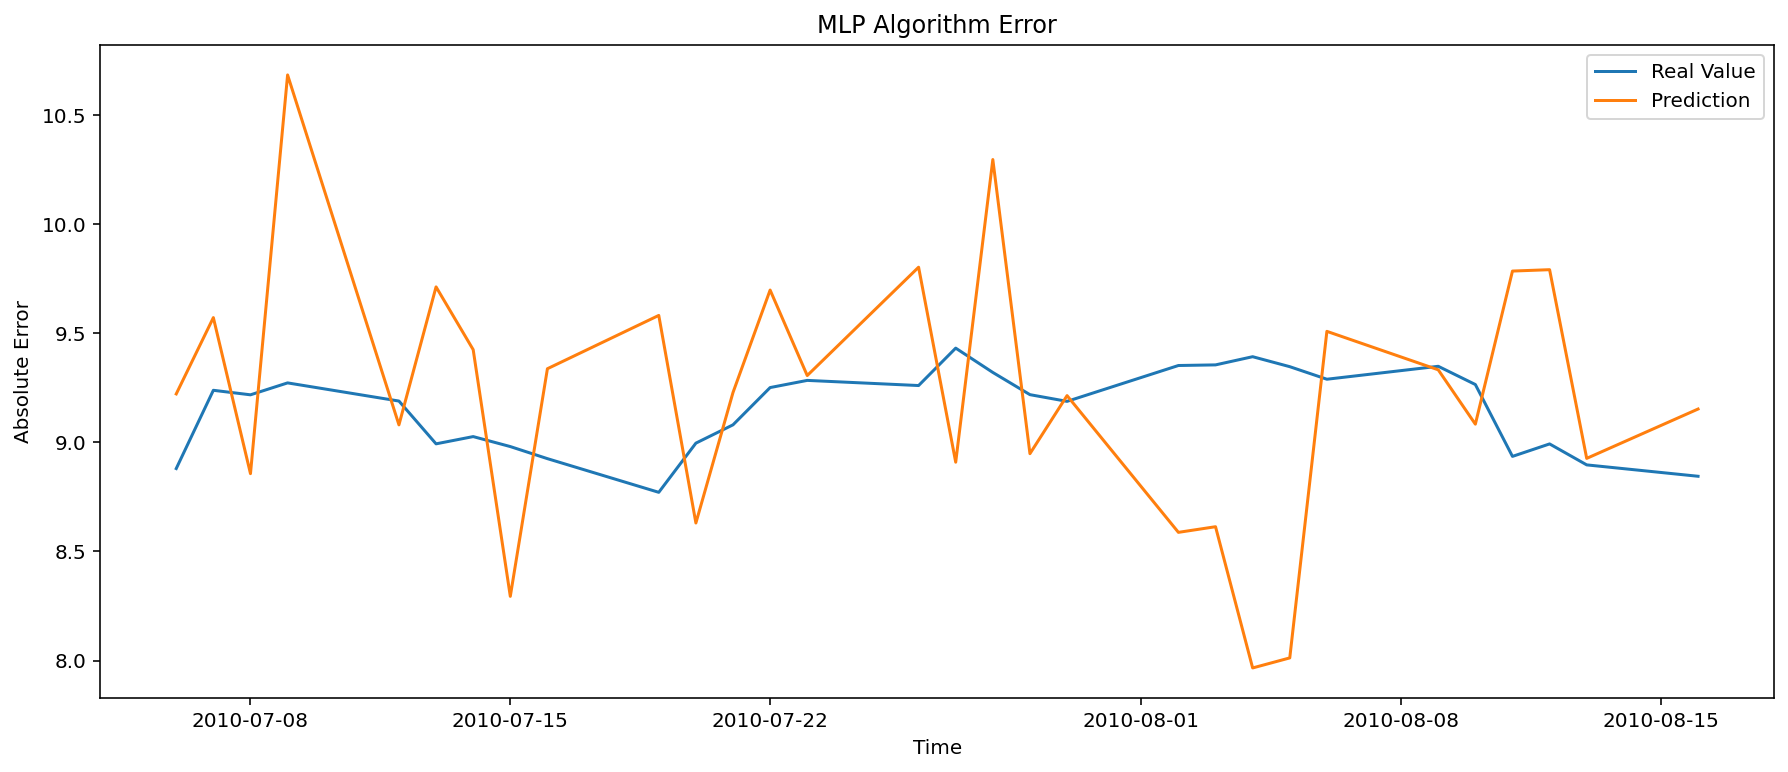

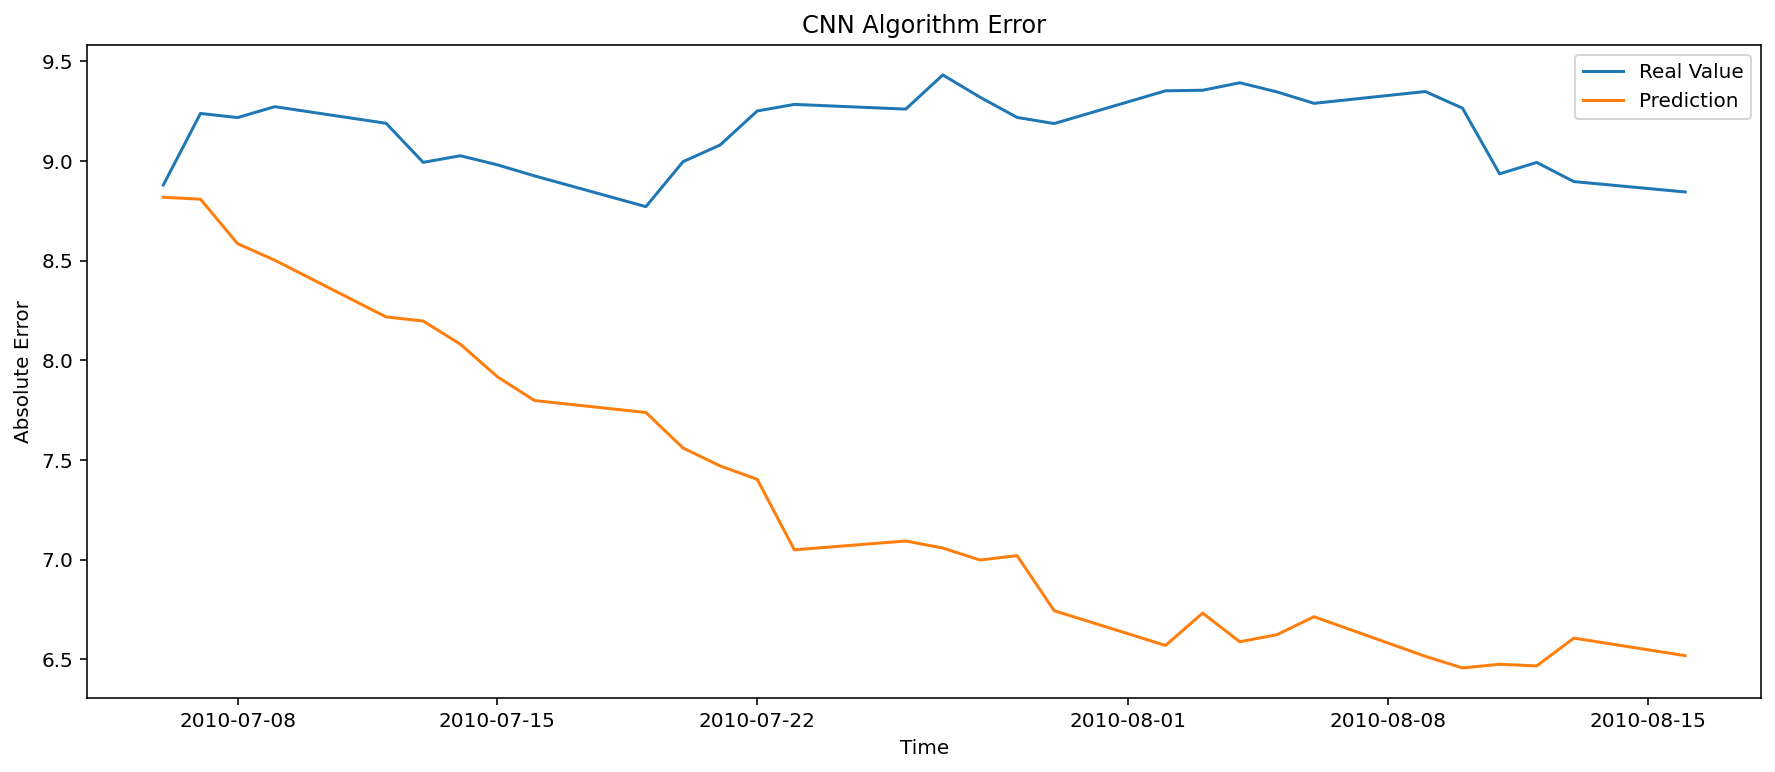

In [23]:
plot_performance(ui6)

In [ ]:
training = DataLoader('aapl', '2005-01-01', '2010-05-01')

In [ ]:
training = training.get_close()

In [ ]:
motest = HybridUnivariatePredictor(2, 24, 30, training)

In [ ]:
motest.create_cnnlstm()

In [ ]:
motest.fit_model(10)

In [ ]:
motest.show_performance()

In [ ]:
motest = BasicUnivariatePredictor(24, 30, training)

In [ ]:
motest.create_cnn()

In [ ]:
motest.fit_model(300)

In [ ]:
motest.show_performance()

In [ ]:
motest.save_model()